# 1. 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

plt.style.use('seaborn')
sns.set(font_scale=2)

import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
PATH = '/content/data.csv'  # Enter the adress
df = pd.read_csv(PATH)

In [ ]:
df.head()

,e_i,i_s,f_t,j_p,ce_ac,ro_ae,kolb_type,divergers,assimilators,convergers,...,at7,at8,at9,at10,at11,at12,at13,at14,at15,at16
0,외향 (Extraversion),직관 (iNtuition),감정 (Feeling),판단 (Judging),구체적 경험 ( CE ),반성적 성찰 ( RO ),분산자,6,6,4,...,7,7,7,7,6,6,6,6,5,6
1,외향 (Extraversion),감각 (Sensing),감정 (Feeling),판단 (Judging),구체적 경험 ( CE ),능동적 실험 ( AE ),융합자,2,5,3,...,4,4,4,4,4,3,3,3,3,2
2,외향 (Extraversion),감각 (Sensing),사고 (Thinking),판단 (Judging),추상적 개념화 ( AC ),반성적 성찰 ( RO ),수렴자,3,5,7,...,3,6,5,6,5,6,5,2,5,6
3,외향 (Extraversion),직관 (iNtuition),사고 (Thinking),인식 (Perceiving),추상적 개념화 ( AC ),능동적 실험 ( AE ),융합자,4,4,4,...,5,6,4,6,6,5,5,5,5,6
4,내향 (Introversion),감각 (Sensing),사고 (Thinking),인식 (Perceiving),구체적 경험 ( CE ),반성적 성찰 ( RO ),수렴자,3,5,6,...,2,3,3,2,5,3,4,3,3,4


In [ ]:
df.shape

(500, 72)

In [ ]:
df.describe()

,divergers,assimilators,convergers,accommodators,lp1,lp2_r,lp3_r,lp4_r,lp5_r,lp6_r,...,at7,at8,at9,at10,at11,at12,at13,at14,at15,at16
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.00000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,4.566000,4.654000,4.694000,4.222000,5.686000,4.57600,3.370000,3.77800,3.760000,3.788000,...,4.444000,3.978000,3.970000,3.580000,4.118000,4.054000,4.032000,3.564000,3.802000,3.984000
std,1.494695,1.364554,1.446565,1.549684,1.123356,1.47668,1.482395,1.60807,1.604852,1.601307,...,1.554251,1.605825,1.645148,1.569882,1.596613,1.453034,1.463989,1.423361,1.443247,1.514044
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,4.000000,4.000000,3.000000,5.000000,4.00000,2.000000,3.00000,3.000000,3.000000,...,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5.000000,5.000000,5.000000,4.000000,6.000000,5.00000,3.000000,4.00000,4.000000,4.000000,...,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,6.000000,6.000000,6.000000,5.000000,6.000000,6.00000,4.000000,5.00000,5.000000,5.000000,...,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,7.00000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [ ]:
for col in df.columns:
    msg = 'column:{:>10}\t Pecent of NaN value: {:.2f}%'. format(col, 100 * (df[col].isnull().sum()/df[col].shape[0]))
    print(msg)

column:       e_i	 Pecent of NaN value: 0.00%
column:       i_s	 Pecent of NaN value: 0.00%
column:       f_t	 Pecent of NaN value: 0.00%
column:       j_p	 Pecent of NaN value: 0.00%
column:     ce_ac	 Pecent of NaN value: 0.00%
column:     ro_ae	 Pecent of NaN value: 0.00%
column: kolb_type	 Pecent of NaN value: 0.00%
column: divergers	 Pecent of NaN value: 0.00%
column:assimilators	 Pecent of NaN value: 0.00%
column:convergers	 Pecent of NaN value: 0.00%
column:accommodators	 Pecent of NaN value: 0.00%
column:       lp1	 Pecent of NaN value: 0.00%
column:     lp2_r	 Pecent of NaN value: 0.00%
column:     lp3_r	 Pecent of NaN value: 0.00%
column:     lp4_r	 Pecent of NaN value: 0.00%
column:     lp5_r	 Pecent of NaN value: 0.00%
column:     lp6_r	 Pecent of NaN value: 0.00%
column:     lp7_r	 Pecent of NaN value: 0.00%
column:     lp8_r	 Pecent of NaN value: 0.00%
column:       ls1	 Pecent of NaN value: 0.00%
column:       ls2	 Pecent of NaN value: 0.00%
column:       ls3	 Pecent of 

# 2. 데이터 전처리
 - 한국어 >> 영어로
 - MBTI 컬럼 추가
 - 점수 리버싱

In [ ]:
def encodingEI(x):
  if x == '외향 (Extraversion)':
    return 'E'
  elif x == '내향 (Introversion)':
    return 'I'

def encodingNS(x):
  if x == '직관 (iNtuition)':
    return 'N'
  elif x == '감각 (Sensing)':
    return 'S'

def encodingFT(x):
  if x == '감정 (Feeling)':
    return 'F'
  elif x == '사고 (Thinking)':
    return 'T'

def encodingJP(x):
  if x == '판단 (Judging)':
    return 'J'
  elif x == '인식 (Perceiving)':
    return 'P'

In [ ]:
df['e_i'] = df['e_i'].apply(encodingEI)
df['i_s'] = df['i_s'].apply(encodingNS)
df['f_t'] = df['f_t'].apply(encodingFT)
df['j_p'] = df['j_p'].apply(encodingJP)

In [ ]:
def encodingMBTI(x):
  result = ''

  if x['e_i'] == 'E':
    result1 = 'E'
  elif x['e_i'] == 'I':
    result1 = 'I'
  if x['i_s'] == 'N':
    result2 = 'N'
  elif x['i_s'] == 'S':
    result2 = 'S'
  if x['f_t'] == 'F':
    result3 = 'F'
  elif x['f_t'] == 'T':
    result3 = 'T'
  if x['j_p'] == 'J':
    result4 = 'J'
  elif x['j_p'] == 'P':
    result4 = 'P'

  result = result1 + result2 + result3 + result4
  return result

In [ ]:
for i in range(len(df)):
  df.loc[i, 'mbti'] = encodingMBTI(df.loc[i])

In [ ]:
def encodingCEAC(x):
  if x == '추상적 개념화 ( AC )':
    return 'AC'
  elif x == '구체적 경험 ( CE )':
    return 'CE'

def encodingROAE(x):
  if x == '능동적 실험 ( AE )':
    return 'AE'
  elif x == '반성적 성찰 ( RO )':
    return 'RO'

In [ ]:
df['ce_ac'] = df['ce_ac'].apply(encodingCEAC)
df['ro_ae'] = df['ro_ae'].apply(encodingROAE)

In [ ]:
def encodingKolb(x):
  if x == '분산자':
    return 'Divergers'
  elif x == '융합자':
    return 'Assimilators'
  elif x == '수렴자':
    return 'Convergers'
  elif x == '적응자':
    return 'Accommodators'

In [ ]:
df['kolb_type'] = df['kolb_type'].apply(encodingKolb)

점수 리버싱

In [ ]:
def reverseScore(x):
  if x == 1:
    return 7
  elif x == 2:
    return 6
  elif x == 3:
    return 5
  elif x == 4:
    return 4
  elif x == 5:
    return 3
  elif x == 6:
    return 2
  elif x == 7:
    return 1

In [ ]:
# 리버싱 해야하는 문항 여기에 추가하기기
reversingList = ['lp2_r', 'lp3_r', 'lp4_r', 'lp5_r', 'lp6_r', 'lp7_r', 'lp8_r']

for i in reversingList:
  df[i] = df[i].apply(reverseScore)
  df = df.astype({i:'int'})

In [ ]:
df

,e_i,i_s,f_t,j_p,ce_ac,ro_ae,kolb_type,divergers,assimilators,convergers,...,at8,at9,at10,at11,at12,at13,at14,at15,at16,mbti
0,E,N,F,J,CE,RO,Divergers,6,6,4,...,7,7,7,6,6,6,6,5,6,ENFJ
1,E,S,F,J,CE,AE,Assimilators,2,5,3,...,4,4,4,4,3,3,3,3,2,ESFJ
2,E,S,T,J,AC,RO,Convergers,3,5,7,...,6,5,6,5,6,5,2,5,6,ESTJ
3,E,N,T,P,AC,AE,Assimilators,4,4,4,...,6,4,6,6,5,5,5,5,6,ENTP
4,I,S,T,P,CE,RO,Convergers,3,5,6,...,3,3,2,5,3,4,3,3,4,ISTP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,I,S,F,P,CE,AE,Accommodators,2,2,2,...,1,1,1,1,1,1,1,1,1,ISFP
496,I,N,T,P,CE,AE,Accommodators,4,4,4,...,6,6,4,4,5,4,5,4,6,INTP
497,I,S,F,J,CE,RO,Divergers,6,5,5,...,3,2,1,6,1,1,1,3,6,ISFJ
498,E,N,F,P,CE,RO,Divergers,5,4,4,...,4,4,4,3,3,3,3,3,5,ENFP


# 3. Kolb 별 MBTI 분석

In [ ]:
df_Kolb = df[['kolb_type', 'mbti']]
df_Kolb

,kolb_type,mbti
0,Divergers,ENFJ
1,Assimilators,ESFJ
2,Convergers,ESTJ
3,Assimilators,ENTP
4,Convergers,ISTP
...,...,...
495,Accommodators,ISFP
496,Accommodators,INTP
497,Divergers,ISFJ
498,Divergers,ENFP


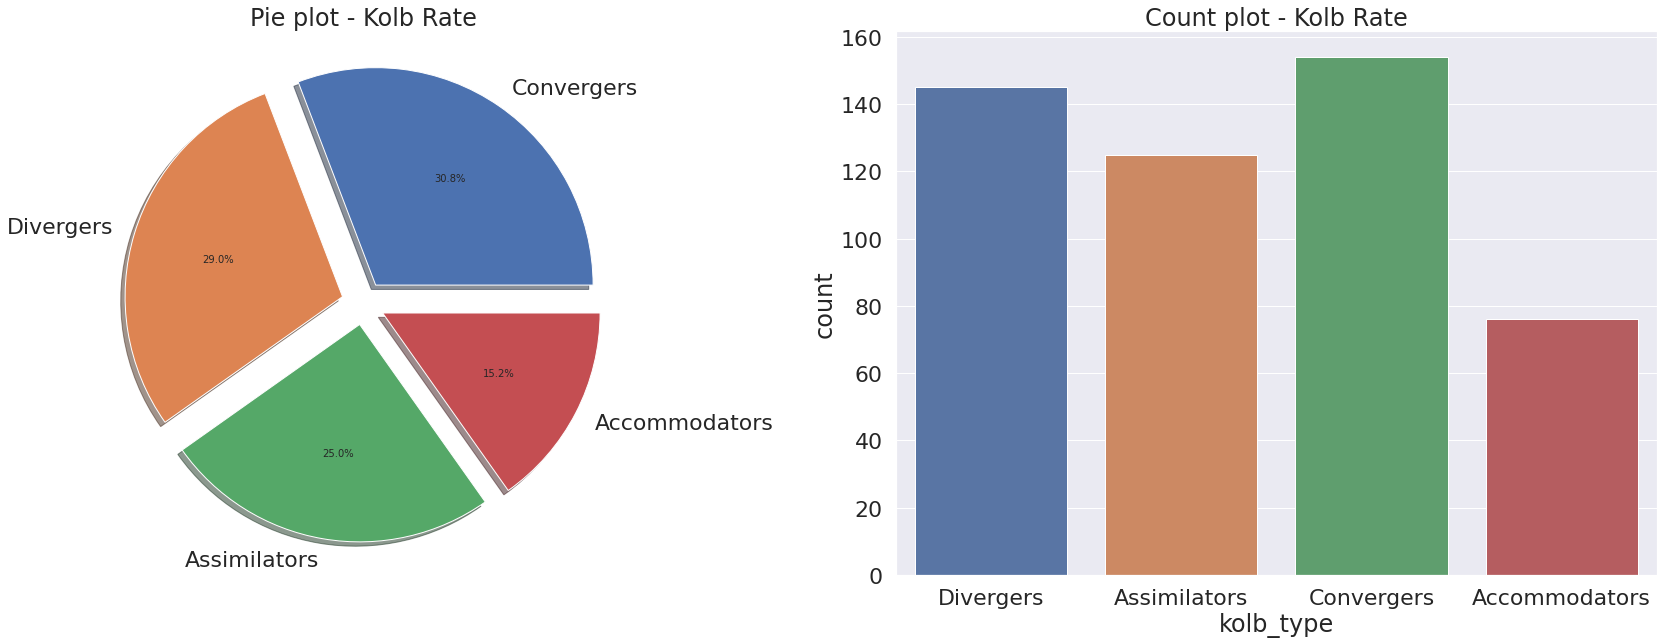

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (30, 10))

df_Kolb['kolb_type'].value_counts().plot.pie(explode = [0.1, 0.1, 0.1, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Pie plot - Kolb Rate')
ax[0].set_ylabel('')
sns.countplot('kolb_type', data = df_Kolb, ax = ax[1])
ax[1].set_title('Count plot - Kolb Rate')
plt.show()

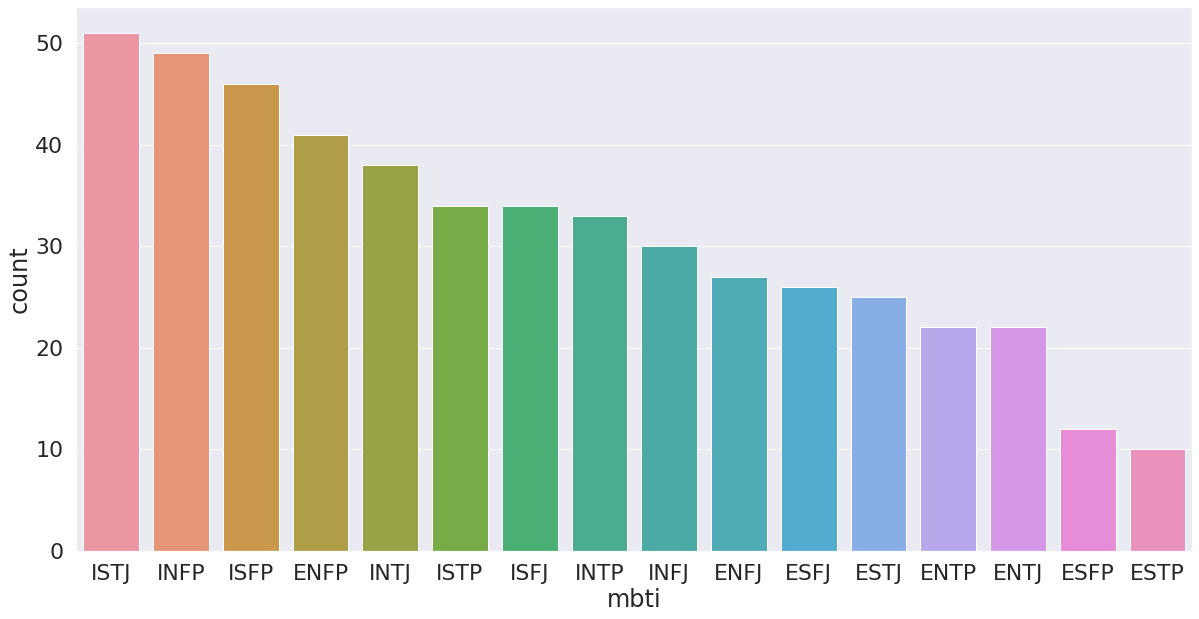

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.countplot('mbti', data = df_Kolb, order=df_Kolb['mbti'].value_counts().index)
plt.show()

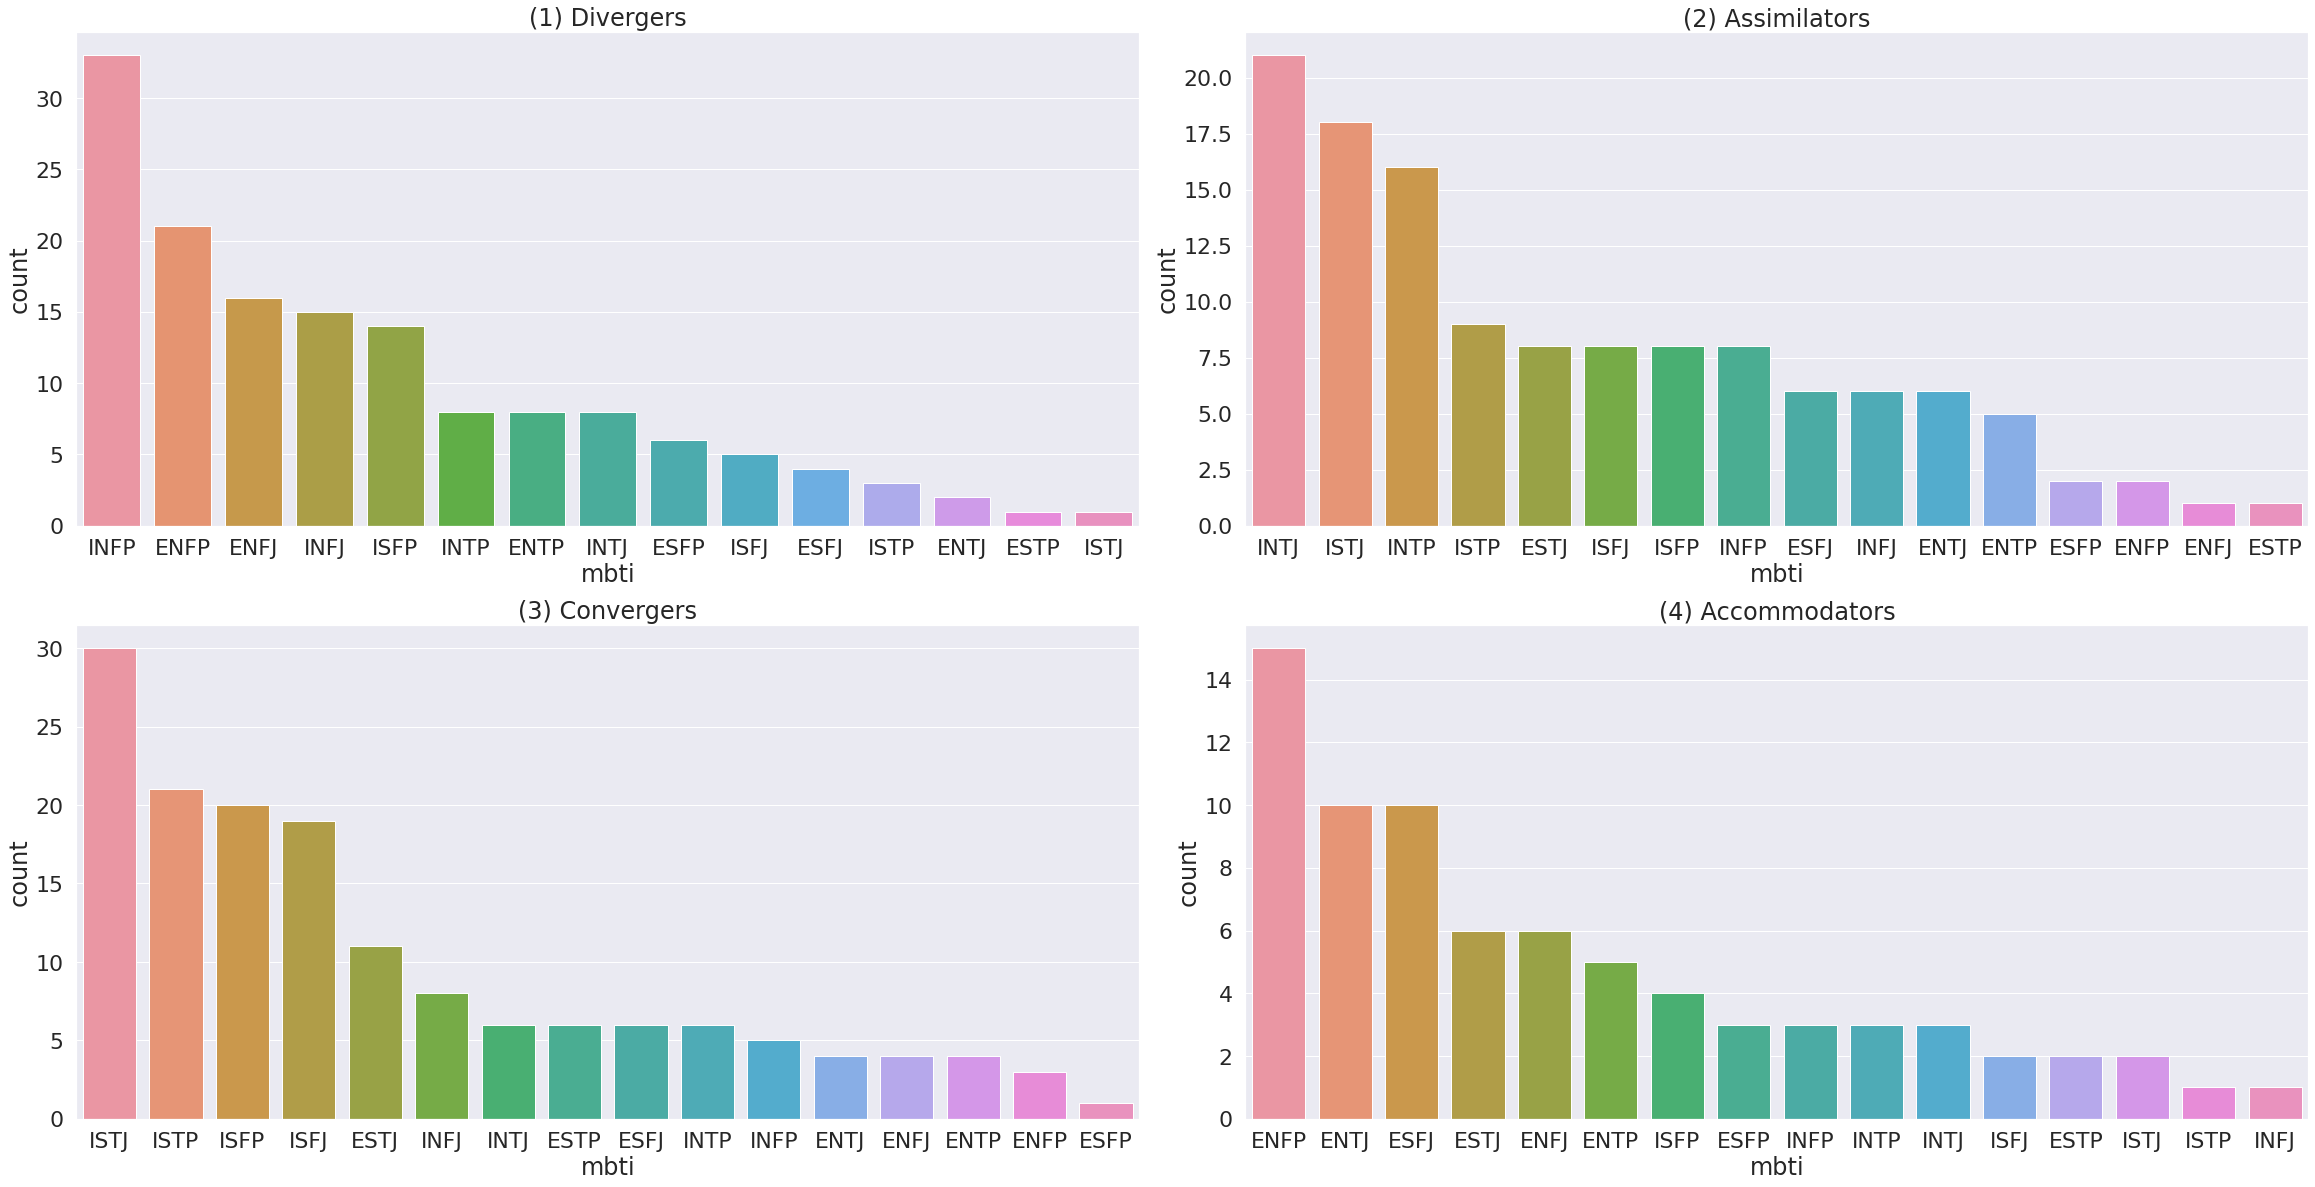

In [ ]:
idx1 = df_Kolb.loc[df_Kolb['kolb_type'] == 'Divergers'].index
idx2 = df_Kolb.loc[df_Kolb['kolb_type'] == 'Assimilators'].index
idx3 = df_Kolb.loc[df_Kolb['kolb_type'] == 'Convergers'].index
idx4 = df_Kolb.loc[df_Kolb['kolb_type'] == 'Accommodators'].index

f, ax = plt.subplots(2, 2, figsize=(40, 20))
sns.countplot('mbti', data=df_Kolb.loc[idx1], ax=ax[0, 0], order=df_Kolb.loc[idx1, 'mbti'].value_counts().index)
ax[0, 0].set_title('(1) Divergers')

sns.countplot('mbti', data=df_Kolb.loc[idx2], ax=ax[0, 1], order=df_Kolb.loc[idx2, 'mbti'].value_counts().index)
ax[0, 1].set_title('(2) Assimilators')

sns.countplot('mbti', data=df_Kolb.loc[idx3], ax=ax[1, 0], order=df_Kolb.loc[idx3, 'mbti'].value_counts().index)
ax[1, 0].set_title('(3) Convergers')

sns.countplot('mbti', data=df_Kolb.loc[idx4], ax=ax[1, 1], order=df_Kolb.loc[idx4, 'mbti'].value_counts().index)
ax[1, 1].set_title('(4) Accommodators')

plt.subplots_adjust(wspace=0.1, hspace=0.2)
plt.show()

# 4. Kolb 별 Learing Preference 분석

In [ ]:
df_LP = df[['kolb_type', 'lp1', 'lp2_r', 'lp3_r', 'lp4_r', 'lp5_r', 'lp6_r', 'lp7_r', 'lp8_r']]

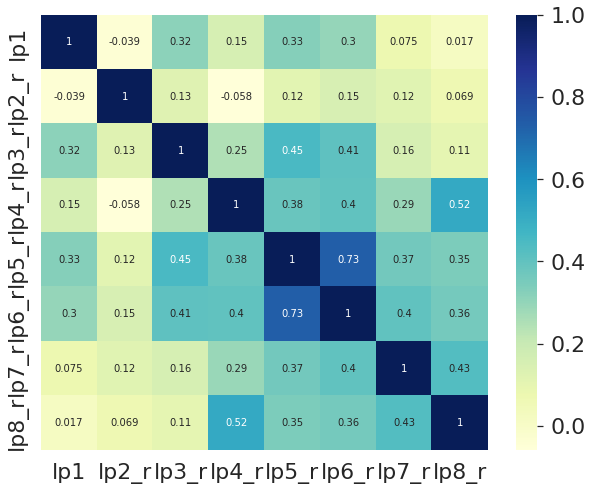

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.heatmap(df_LP.corr(), annot=True, cmap="YlGnBu")
plt.show()

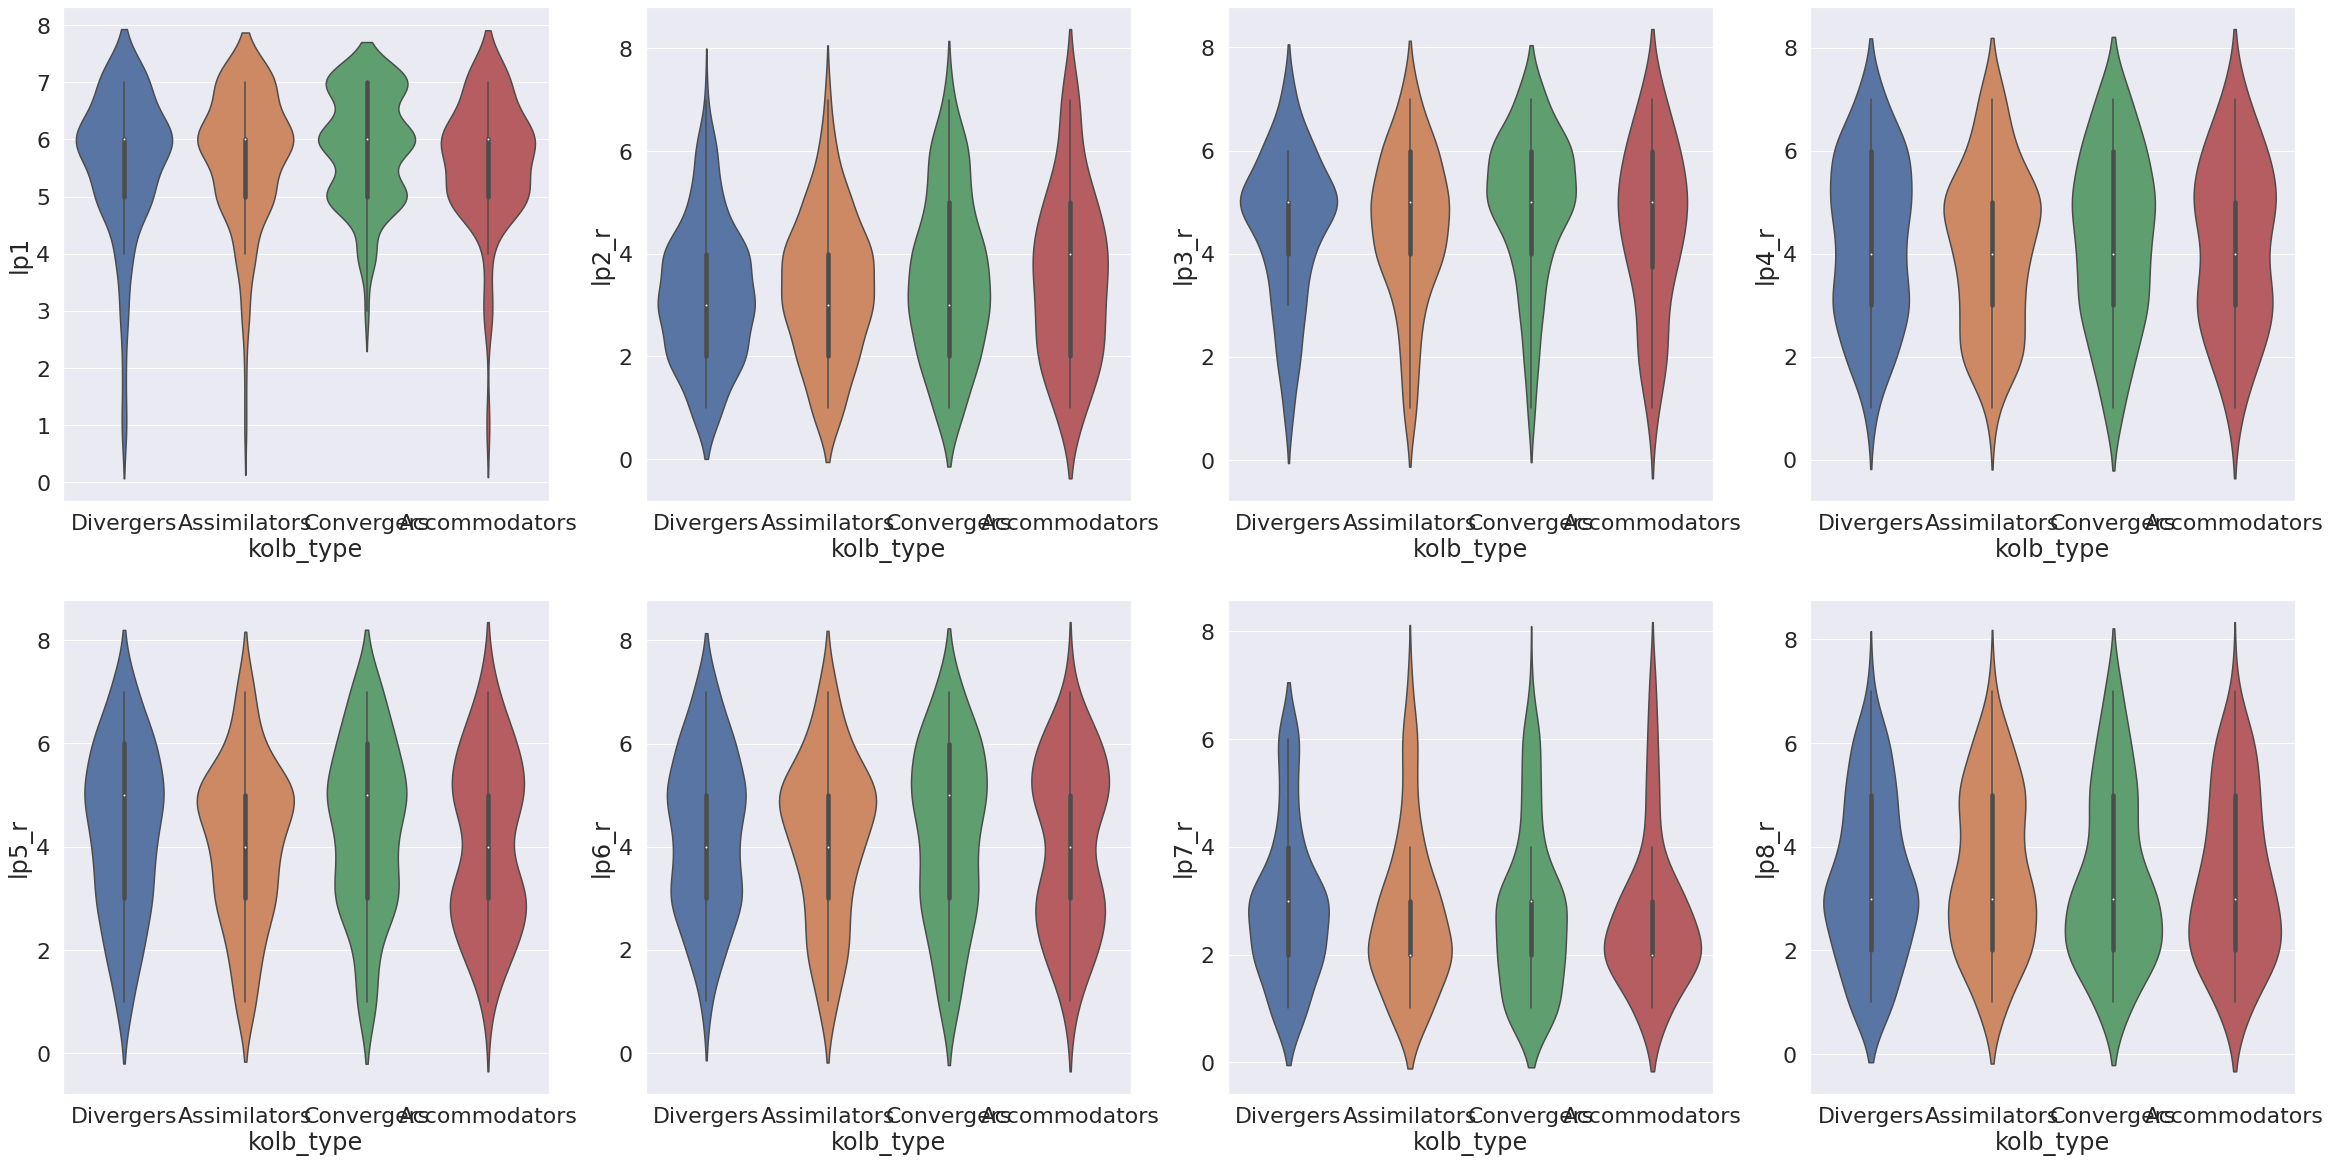

In [ ]:
f, ax = plt.subplots(2, 4, figsize=(40, 20))
sns.set(font_scale=1.5)
sns.violinplot(x="kolb_type", y="lp1", data=df_LP, ax=ax[0, 0])
sns.violinplot(x="kolb_type", y="lp2_r", data=df_LP, ax=ax[0, 1])
sns.violinplot(x="kolb_type", y="lp3_r", data=df_LP, ax=ax[0, 2])
sns.violinplot(x="kolb_type", y="lp4_r", data=df_LP, ax=ax[0, 3])
sns.violinplot(x="kolb_type", y="lp5_r", data=df_LP, ax=ax[1, 0])
sns.violinplot(x="kolb_type", y="lp6_r", data=df_LP, ax=ax[1, 1])
sns.violinplot(x="kolb_type", y="lp7_r", data=df_LP, ax=ax[1, 2])
sns.violinplot(x="kolb_type", y="lp8_r", data=df_LP, ax=ax[1, 3])
plt.show()

In [ ]:
gb = df_LP.groupby(['kolb_type']).mean()
gb

,lp1,lp2_r,lp3_r,lp4_r,lp5_r,lp6_r,lp7_r,lp8_r
kolb_type,,,,,,,,
Accommodators,5.605263,3.578947,4.486842,4.171053,4.078947,4.039474,2.684211,3.355263
Assimilators,5.680000,3.376000,4.504000,4.144000,4.104000,4.184000,2.752000,3.520000
Convergers,5.837662,3.564935,4.928571,4.272727,4.363636,4.279221,2.759740,3.370130
Divergers,5.572414,3.234483,4.496552,4.262069,4.310345,4.255172,2.931034,3.351724


In [ ]:
fig = make_subplots(
    rows=2, cols=4,
    vertical_spacing=0.2,
    subplot_titles=("LP1", "LP2", "LP3", "LP4", "LP5", "LP6", "LP7", "LP8"))
fig.add_trace(go.Bar(x=gb.index, y=gb['lp1'], text=gb['lp1'], textposition='auto'), row=1, col=1)
fig.add_trace(go.Bar(x=gb.index, y=gb['lp2_r'], text=gb['lp2_r'], textposition='auto'), row=1, col=2)
fig.add_trace(go.Bar(x=gb.index, y=gb['lp3_r'], text=gb['lp3_r'], textposition='auto'), row=1, col=3)
fig.add_trace(go.Bar(x=gb.index, y=gb['lp4_r'], text=gb['lp4_r'], textposition='auto'), row=1, col=4)
fig.add_trace(go.Bar(x=gb.index, y=gb['lp5_r'], text=gb['lp5_r'], textposition='auto'), row=2, col=1)
fig.add_trace(go.Bar(x=gb.index, y=gb['lp6_r'], text=gb['lp6_r'], textposition='auto'), row=2, col=2)
fig.add_trace(go.Bar(x=gb.index, y=gb['lp7_r'], text=gb['lp7_r'], textposition='auto'), row=2, col=3)
fig.add_trace(go.Bar(x=gb.index, y=gb['lp8_r'], text=gb['lp8_r'], textposition='auto'), row=2, col=4)
fig.update_traces(texttemplate='%{text:.2f}')
fig.update_layout(height=700, width=1000)
fig.show()

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='LP1', x=gb.index, y=gb['lp1'], text=gb['lp1'], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='LP2', x=gb.index, y=gb['lp2_r'], text=gb['lp2_r'], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='LP3', x=gb.index, y=gb['lp3_r'], text=gb['lp3_r'], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='LP4', x=gb.index, y=gb['lp4_r'], text=gb['lp4_r'], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='LP5', x=gb.index, y=gb['lp5_r'], text=gb['lp5_r'], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='LP6', x=gb.index, y=gb['lp6_r'], text=gb['lp6_r'], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='LP7', x=gb.index, y=gb['lp7_r'], text=gb['lp7_r'], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='LP8', x=gb.index, y=gb['lp8_r'], text=gb['lp8_r'], textposition='auto', texttemplate='%{text:.2f}')
])
fig.update_layout(height=1000, width=1000, barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

## Learning Preference 결론
1. 적응자: 본인이 진도를 정하고 싶어함(제일 성향 강함)
2. 융합자: 본인이 진도를 정하고 싶어하는 편
3. 수렴자: 본인이 진도를 정하고 싶어하는 편(융합자 보다는 낮지만 유의미한 차이 X)
4. 분산자: 교수자가 진도를 정해주는 걸 좋아함

그러나 전반적으로는는 모두 교수자가 진도를 정해주는 것을 좋아함.
<br>그리고 평가(LP7, LP8)에 관해서만 본인이 정하고 싶어함.

(근데 그냥 애초에 Kolb별로 딱히 차이가 없음 ㅎ)

# 5. Kolb 별 Learning Style 분석

In [ ]:
df_LS = df[['kolb_type', 'ls1', 'ls2', 'ls3', 'ls4', 'ls5', 'ls6', 'ls7', 'ls8', 'ls9', 'ls10', 'ls11', 'ls12', 'ls13', 'ls14']]

visual = ['ls1', 'ls5', 'ls11', 'ls14']
auditory = ['ls2', 'ls4', 'ls7', 'ls9', 'ls13']
kinesthetic = ['ls3', 'ls6', 'ls8', 'ls10', 'ls12']

In [ ]:
fig = px.density_heatmap(df_LS, x="kolb_type", y=visual, text_auto=True, title="Visual")
fig.show()

In [ ]:
fig = px.density_heatmap(df_LS, x="kolb_type", y=auditory, text_auto=True, title="Auditory")
fig.show()

In [ ]:
fig = px.density_heatmap(df_LS, x="kolb_type", y=kinesthetic, text_auto=True, title="Kinesthetic")
fig.show()

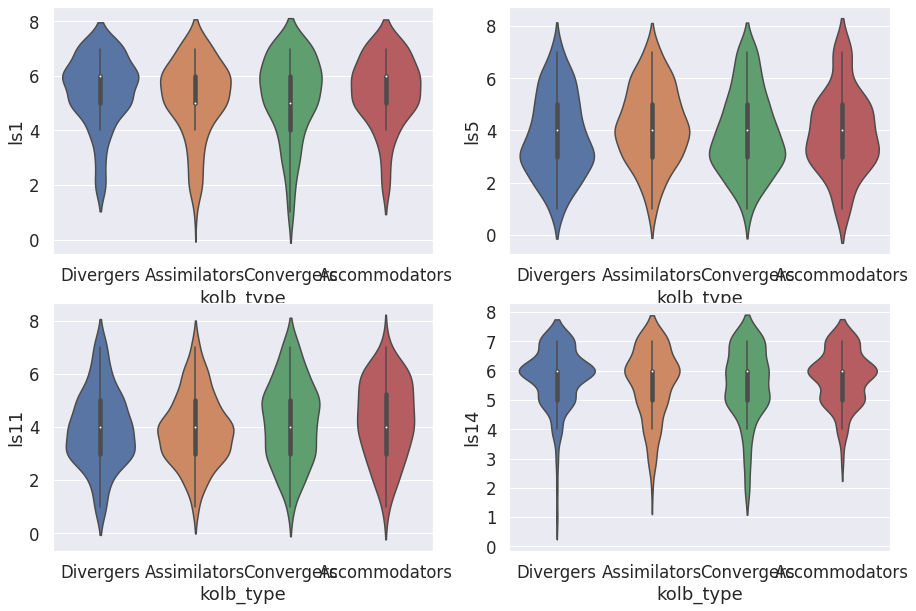

In [ ]:
#Visual
f, ax = plt.subplots(2, 2, figsize=(15, 10))
sns.set(font_scale=0.2)
sns.violinplot(x="kolb_type", y=visual[0], data=df_LS, ax=ax[0, 0])
sns.violinplot(x="kolb_type", y=visual[1], data=df_LS, ax=ax[0, 1])
sns.violinplot(x="kolb_type", y=visual[2], data=df_LS, ax=ax[1, 0])
sns.violinplot(x="kolb_type", y=visual[3], data=df_LS, ax=ax[1, 1])
plt.show()

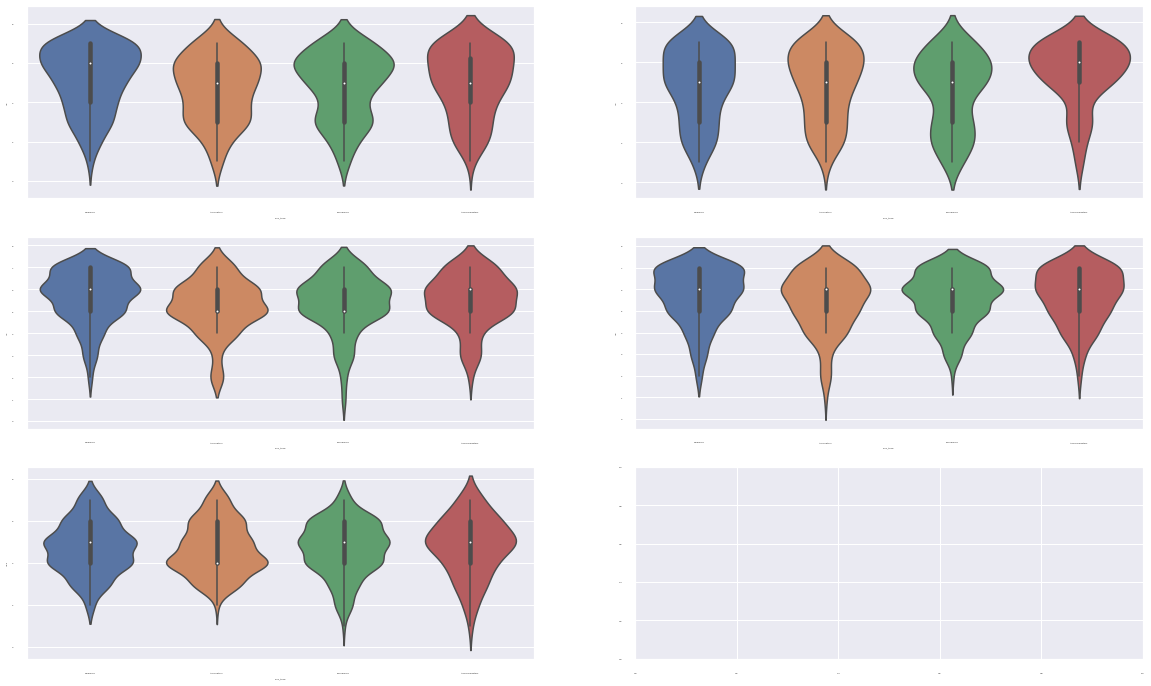

In [ ]:
#Auditory
f, ax = plt.subplots(3, 2, figsize=(20, 12))
sns.set(font_scale=0.9)
sns.violinplot(x="kolb_type", y=auditory[0], data=df_LS, ax=ax[0, 0])
sns.violinplot(x="kolb_type", y=auditory[1], data=df_LS, ax=ax[0, 1])
sns.violinplot(x="kolb_type", y=auditory[2], data=df_LS, ax=ax[1, 0])
sns.violinplot(x="kolb_type", y=auditory[3], data=df_LS, ax=ax[1, 1])
sns.violinplot(x="kolb_type", y=auditory[4], data=df_LS, ax=ax[2, 0])
plt.show()

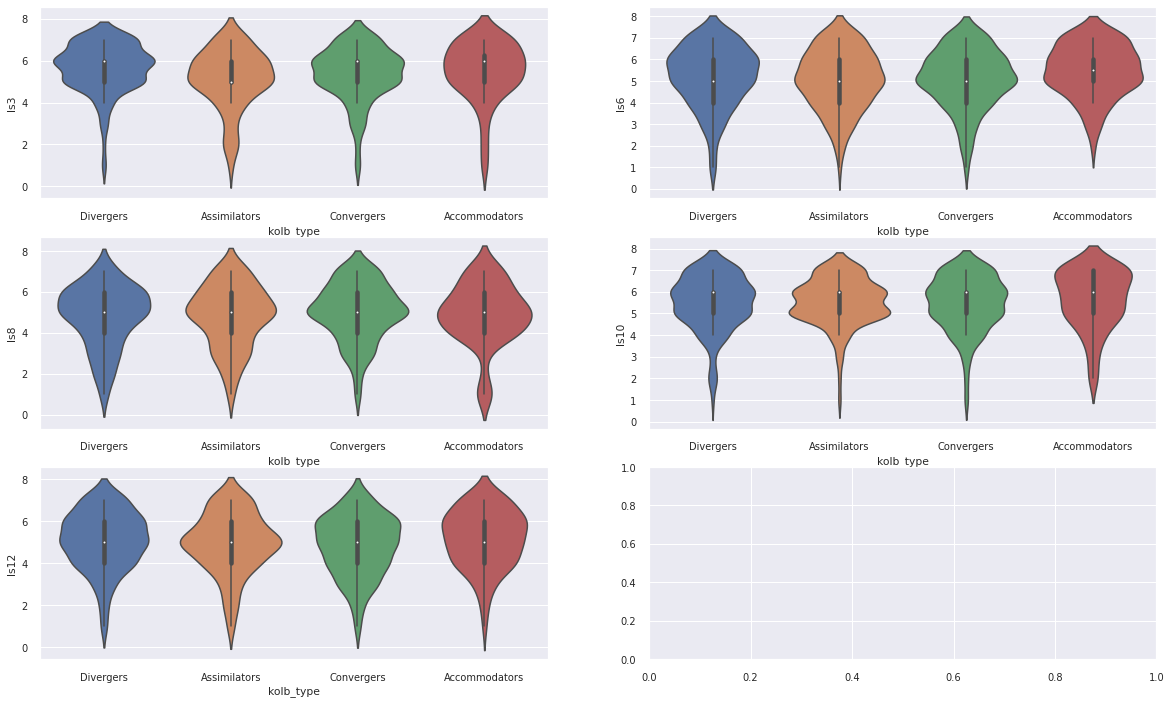

In [ ]:
#Kinesthetic
f, ax = plt.subplots(3, 2, figsize=(20, 12))
sns.set(font_scale=0.9)
sns.violinplot(x="kolb_type", y=kinesthetic[0], data=df_LS, ax=ax[0, 0])
sns.violinplot(x="kolb_type", y=kinesthetic[1], data=df_LS, ax=ax[0, 1])
sns.violinplot(x="kolb_type", y=kinesthetic[2], data=df_LS, ax=ax[1, 0])
sns.violinplot(x="kolb_type", y=kinesthetic[3], data=df_LS, ax=ax[1, 1])
sns.violinplot(x="kolb_type", y=kinesthetic[4], data=df_LS, ax=ax[2, 0])
plt.show()

In [ ]:
gb = df_LS.groupby(['kolb_type']).mean()
print(gb[visual])
print(gb[auditory])
print(gb[kinesthetic])

                    ls1       ls5      ls11      ls14
kolb_type                                            
Accommodators  5.421053  3.907895  4.276316  5.763158
Assimilators   5.168000  4.192000  3.928000  5.576000
Convergers     5.207792  3.896104  4.214286  5.512987
Divergers      5.427586  3.779310  3.937931  5.765517
                    ls2       ls4       ls7       ls9      ls13
kolb_type                                                      
Accommodators  5.000000  5.434211  5.460526  5.657895  4.776316
Assimilators   4.664000  4.840000  5.216000  5.400000  4.656000
Convergers     4.824675  4.532468  5.318182  5.558442  4.681818
Divergers      5.186207  4.827586  5.655172  5.662069  4.724138
                    ls3       ls6       ls8      ls10      ls12
kolb_type                                                      
Accommodators  5.486842  5.460526  4.894737  5.631579  5.144737
Assimilators   5.128000  5.048000  4.800000  5.528000  4.928000
Convergers     5.357143  5.084416  5

In [ ]:
# Visual
fig = make_subplots(
    rows=1, cols=4,
    horizontal_spacing=0.02,
    subplot_titles=("LS1", "LS5", "LS11", "LS14"))
fig.add_trace(go.Bar(x=gb.index, y=gb[visual[0]], text=gb[visual[0]], textposition='auto'), row=1, col=1)
fig.add_trace(go.Bar(x=gb.index, y=gb[visual[1]], text=gb[visual[1]], textposition='auto'), row=1, col=2)
fig.add_trace(go.Bar(x=gb.index, y=gb[visual[2]], text=gb[visual[2]], textposition='auto'), row=1, col=3)
fig.add_trace(go.Bar(x=gb.index, y=gb[visual[3]], text=gb[visual[3]], textposition='auto'), row=1, col=4)
fig.update_traces(texttemplate='%{text:.2f}')
fig.update_layout(height=400, width=1000)
fig.show()

In [ ]:
# Auditory
fig = make_subplots(
    rows=1, cols=5,
    horizontal_spacing=0.02,
    subplot_titles=("LS2", "LS4", "LS7", "LS9", "LS13"))
fig.add_trace(go.Bar(x=gb.index, y=gb[auditory[0]], text=gb[auditory[0]], textposition='auto'), row=1, col=1)
fig.add_trace(go.Bar(x=gb.index, y=gb[auditory[1]], text=gb[auditory[1]], textposition='auto'), row=1, col=2)
fig.add_trace(go.Bar(x=gb.index, y=gb[auditory[2]], text=gb[auditory[2]], textposition='auto'), row=1, col=3)
fig.add_trace(go.Bar(x=gb.index, y=gb[auditory[3]], text=gb[auditory[3]], textposition='auto'), row=1, col=4)
fig.add_trace(go.Bar(x=gb.index, y=gb[auditory[4]], text=gb[auditory[4]], textposition='auto'), row=1, col=5)
fig.update_traces(texttemplate='%{text:.2f}')
fig.update_layout(height=400, width=1200)
fig.show()

In [ ]:
# Kinesthetic
fig = make_subplots(
    rows=1, cols=5,
    horizontal_spacing=0.02,
    subplot_titles=("LS3", "LS6", "LS8", "LS10", "LS12"))
fig.add_trace(go.Bar(x=gb.index, y=gb[kinesthetic[0]], text=gb[kinesthetic[0]], textposition='auto'), row=1, col=1)
fig.add_trace(go.Bar(x=gb.index, y=gb[kinesthetic[1]], text=gb[kinesthetic[1]], textposition='auto'), row=1, col=2)
fig.add_trace(go.Bar(x=gb.index, y=gb[kinesthetic[2]], text=gb[kinesthetic[2]], textposition='auto'), row=1, col=3)
fig.add_trace(go.Bar(x=gb.index, y=gb[kinesthetic[3]], text=gb[kinesthetic[3]], textposition='auto'), row=1, col=4)
fig.add_trace(go.Bar(x=gb.index, y=gb[kinesthetic[4]], text=gb[kinesthetic[4]], textposition='auto'), row=1, col=5)
fig.update_traces(texttemplate='%{text:.2f}')
fig.update_layout(height=400, width=1200)
fig.show()

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='LS1', x=gb.index, y=gb[visual[0]], text=gb[visual[0]], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='LS5', x=gb.index, y=gb[visual[1]], text=gb[visual[1]], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='LS11', x=gb.index, y=gb[visual[2]], text=gb[visual[2]], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='LS14', x=gb.index, y=gb[visual[3]], text=gb[visual[3]], textposition='auto', texttemplate='%{text:.2f}')
])
fig.update_layout(height=700, width=800, barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='LS2', x=gb.index, y=gb[auditory[0]], text=gb[auditory[0]], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='LS4', x=gb.index, y=gb[auditory[1]], text=gb[auditory[1]], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='LS7', x=gb.index, y=gb[auditory[2]], text=gb[auditory[2]], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='LS9', x=gb.index, y=gb[auditory[3]], text=gb[auditory[3]], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='LS13', x=gb.index, y=gb[auditory[3]], text=gb[auditory[3]], textposition='auto', texttemplate='%{text:.2f}')
])
fig.update_layout(height=750, width=900, barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='LS3', x=gb.index, y=gb[kinesthetic[0]], text=gb[kinesthetic[0]], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='LS6', x=gb.index, y=gb[kinesthetic[1]], text=gb[kinesthetic[1]], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='LS8', x=gb.index, y=gb[kinesthetic[2]], text=gb[kinesthetic[2]], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='LS10', x=gb.index, y=gb[kinesthetic[3]], text=gb[kinesthetic[3]], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='LS12', x=gb.index, y=gb[kinesthetic[4]], text=gb[kinesthetic[4]], textposition='auto', texttemplate='%{text:.2f}')
])
fig.update_layout(height=750, width=900, barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

## Learning Style 결론

* Visual = 약간 교재 읽기, Only 시각
* Auditory = 강의 듣기 or 설명 듣기, 시각 + 청각
* Kinesthetic = 활동 or 실습 위주 

<br>

**Visual**
1. 적응자: 가장 선호
2. 융합자: 가장 선호하지 않음(교재 읽는 방식을 특히 선호함)
3. 수렴자: 선호하지 않음(AI/SW과목에서 교재 읽는 방식을 특히 선호함)
4. 분산자: 선호(교수자가 칠판에 적는 방식을 특히 선호함)

* 전체적으로 교재를 읽는 방식의 선호도 낮음
* 전체적으로 교수자의 판서와 예시를 보는 것을 특히 선호

<br>

**Auditory**
1. 적응자: 많이 선호(교재를 소리내어 읽는 것을 특히 선호)
2. 융합자: 가장 선호하지 않음
3. 수렴자: 많이 선호하지 않음
4. 분산자: 가장 선호

* 전체적인 점수 자체가 높음. 즉, 다들 선호하는데 더 좋아하는지 덜 좋아하는지의 차이
* 기본적으로 청각 + 시각을 좋아하는 듯

<br>

**Kinesthetic**
1. 적응자: 가장 선호
2. 융합자: 가장 선호하지 않음(학습 활동을 특히 덜 선호)
3. 수렴자: 많이 선호하지 않음(SW/AI에서 실습을 특히 선호)
4. 분산자: 많이 선호(기본적으로 학습 활동 자체를 특히 선호)

* 전체적인 점수 자체가 높음. 즉, 다들 선호하는데 더 좋아하는지 덜 좋아하는지의 차이

<br>

**전체적인 결론**
* 일단 모든 스타일에서 적응자와 분산자는 높은 선호도, 융합자와 수렴자는 낮은 선호도를 보임.
* 즉, 적응자와 분산자가 학습 자체에 대한 긍정적인 반응을 보임.
* Kolb 유형별로 선호하는 학습 스타일이 갈리지 않음.

# 6. Kolb 별 Motivation 분석

In [ ]:
df_M = df[['kolb_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13']]
motivation = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13']

In [ ]:
fig = px.density_heatmap(df_M, x="kolb_type", y=motivation, text_auto=True, title="Motivation")
fig.show()

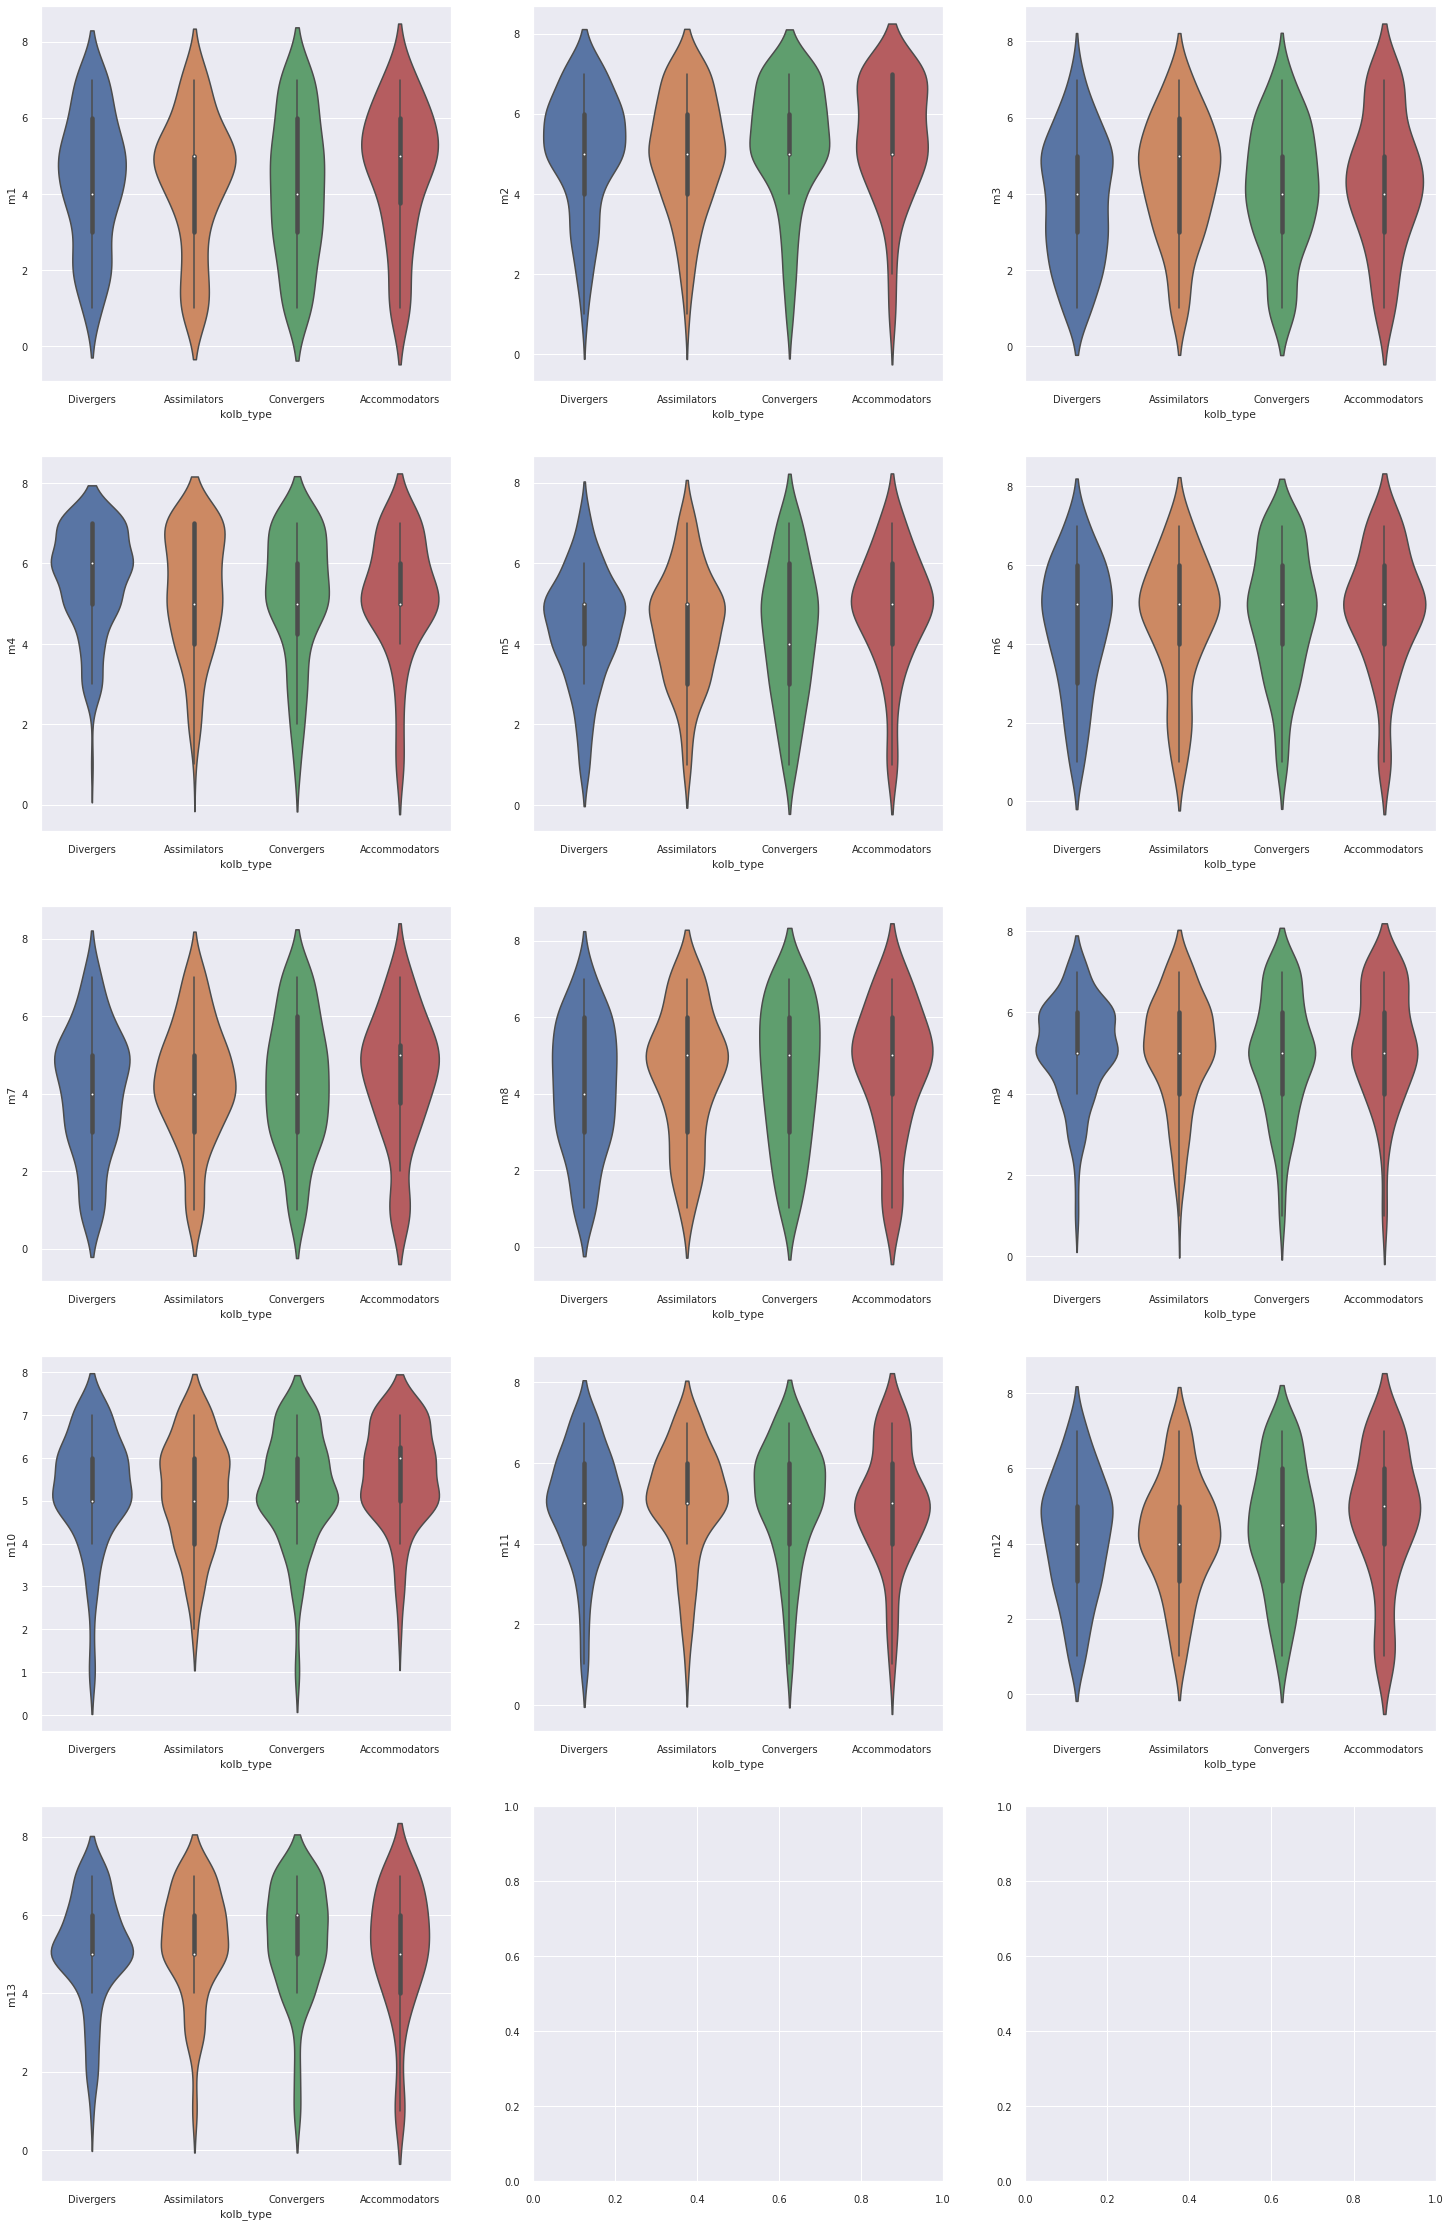

In [ ]:
#Kinesthetic
f, ax = plt.subplots(5, 3, figsize=(25, 40))
sns.set(font_scale=0.9)
sns.violinplot(x="kolb_type", y=motivation[0], data=df_M, ax=ax[0, 0])
sns.violinplot(x="kolb_type", y=motivation[1], data=df_M, ax=ax[0, 1])
sns.violinplot(x="kolb_type", y=motivation[2], data=df_M, ax=ax[0, 2])
sns.violinplot(x="kolb_type", y=motivation[3], data=df_M, ax=ax[1, 0])
sns.violinplot(x="kolb_type", y=motivation[4], data=df_M, ax=ax[1, 1])
sns.violinplot(x="kolb_type", y=motivation[5], data=df_M, ax=ax[1, 2])
sns.violinplot(x="kolb_type", y=motivation[6], data=df_M, ax=ax[2, 0])
sns.violinplot(x="kolb_type", y=motivation[7], data=df_M, ax=ax[2, 1])
sns.violinplot(x="kolb_type", y=motivation[8], data=df_M, ax=ax[2, 2])
sns.violinplot(x="kolb_type", y=motivation[9], data=df_M, ax=ax[3, 0])
sns.violinplot(x="kolb_type", y=motivation[10], data=df_M, ax=ax[3, 1])
sns.violinplot(x="kolb_type", y=motivation[11], data=df_M, ax=ax[3, 2])
sns.violinplot(x="kolb_type", y=motivation[12], data=df_M, ax=ax[4, 0])
plt.show()

In [ ]:
gb = df_M.groupby(['kolb_type']).mean()
gb

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
kolb_type,,,,,,,,,,,,,
Accommodators,4.605263,5.368421,4.328947,5.197368,4.828947,4.828947,4.421053,4.618421,5.223684,5.605263,4.947368,4.684211,5.144737
Assimilators,4.328000,5.008000,4.392000,5.256000,4.416000,4.584000,4.264000,4.512000,5.056000,5.192000,5.032000,4.264000,5.272000
Convergers,4.129870,5.259740,4.129870,5.181818,4.318182,4.772727,4.285714,4.435065,4.941558,5.292208,5.045455,4.467532,5.344156
Divergers,4.310345,5.041379,3.834483,5.593103,4.393103,4.468966,4.075862,4.165517,5.103448,5.275862,4.944828,4.220690,5.096552


In [ ]:
fig = go.Figure(data=[
    go.Bar(name='M1', x=gb.index, y=gb[motivation[0]], text=gb[motivation[0]], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='M2', x=gb.index, y=gb[motivation[1]], text=gb[motivation[1]], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='M3', x=gb.index, y=gb[motivation[2]], text=gb[motivation[2]], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='M4', x=gb.index, y=gb[motivation[3]], text=gb[motivation[3]], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='M5', x=gb.index, y=gb[motivation[4]], text=gb[motivation[4]], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='M6', x=gb.index, y=gb[motivation[5]], text=gb[motivation[5]], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='M7', x=gb.index, y=gb[motivation[6]], text=gb[motivation[6]], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='M8', x=gb.index, y=gb[motivation[7]], text=gb[motivation[7]], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='M9', x=gb.index, y=gb[motivation[8]], text=gb[motivation[8]], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='M10', x=gb.index, y=gb[motivation[9]], text=gb[motivation[9]], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='M11', x=gb.index, y=gb[motivation[10]], text=gb[motivation[10]], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='M12', x=gb.index, y=gb[motivation[11]], text=gb[motivation[11]], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='M13', x=gb.index, y=gb[motivation[12]], text=gb[motivation[12]], textposition='auto', texttemplate='%{text:.2f}')
])
fig.update_layout(height=1000, width=1000, barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

In [ ]:
print(df_M['m4'])

0      3
1      5
2      3
3      6
4      7
      ..
495    6
496    5
497    7
498    5
499    4
Name: m4, Length: 500, dtype: int64


## Motivation 결론

1. 적응자: motivation이 가장 높음
2. 수렴자: motivation이 약간 높음(거의 평균)
3. 융합자: motivation이 약간 낮음(거의 평균)
4. 분산자: motivation이 가장 낮음

<br>

* Learning Preference와 유사한 분포를 띰.
* 적응자가 제일 자기주도성이 강했고, 분산자가 가장 수동적이었음.
* Learning Style: 모든 스타일에서 적응자와 분산자는 높은 선호도, 융합자와 수렴자는 낮은 선호도를 보임.
* 전체적으로 적응자와 분산자가 본인의 의견 주장이 강하다고 추측할 수 있음.

<br>

**문항별 분석**
* M1: 수렴자의 분산이 높음 >> 수렴자는 프로그래밍에 대한 선호도가 다양함.
* M3: 전체적으로 낮음 >> 어려운 문제에 대한 비선호도가 있음.
* M4: 전체적으로 많이 낮음 >> 어려운 문제에 대한 두려움이 있음. (설문을 대충했을 가능성도 존재.) / 특히 분산자가 많이 싫어함.
* M5: 수렴자의 분산이 높음 >> 도전적인 수업에 대한 선호도가 다양함.
* M7: 전체적으로 약간 낮음 >> 기본적으로 SW/AI 수업에 대한 선호도가 좀 낮음. 
* M10: 전체적으로 특히 높음 >> SW/AI로 특정 짓지 않았을때 Motivation 높음.
* M12: 적응자의 값이 특히 높음 >> SW/AI 과목의 중요성 인지

<br>

**결론**

1. 적응자의 motivation이 가장 높고, 분산자가 가장 낮으며, 이 두 유형이 가장 의견 주장이 강함
2. 어려운 문제 풀기에 대한 motivation이 전체적으로 낮고, SW/AI 과목에 대한 선호도도 낮음.
3. 수렴자의 유형은 Motivation이 다양한 양상을 띠고, 분산자는 어려운 문제를 특히 싫어함(퀴즈 콘텐츠 제공 시 참고).



# 7. 학습자 수준 분석

In [ ]:
df['count'] = 1

In [ ]:
fig = make_subplots(
    rows=8, cols=2,
    horizontal_spacing=0.05,
    vertical_spacing=0.02,
    subplot_titles=("at1", "at2", "at3", "at4", "at5", "at6", "at7", "at8", "at9", "at10", "at11", "at12", "at13", "at14", "at15", "at16")
)
fig.add_trace(go.Bar(x=df["at1"], y=df["count"]), row=1, col=1)
fig.add_trace(go.Bar(x=df["at2"], y=df["count"]), row=1, col=2)
fig.add_trace(go.Bar(x=df["at3"], y=df["count"]), row=2, col=1)
fig.add_trace(go.Bar(x=df["at4"], y=df["count"]), row=2, col=2)
fig.add_trace(go.Bar(x=df["at5"], y=df["count"]), row=3, col=1)
fig.add_trace(go.Bar(x=df["at6"], y=df["count"]), row=3, col=2)
fig.add_trace(go.Bar(x=df["at7"], y=df["count"]), row=4, col=1)
fig.add_trace(go.Bar(x=df["at8"], y=df["count"]), row=4, col=2)
fig.add_trace(go.Bar(x=df["at9"], y=df["count"]), row=5, col=1)
fig.add_trace(go.Bar(x=df["at10"], y=df["count"]), row=5, col=2)
fig.add_trace(go.Bar(x=df["at11"], y=df["count"]), row=6, col=1)
fig.add_trace(go.Bar(x=df["at12"], y=df["count"]), row=6, col=2)
fig.add_trace(go.Bar(x=df["at13"], y=df["count"]), row=7, col=1)
fig.add_trace(go.Bar(x=df["at14"], y=df["count"]), row=7, col=2)
fig.add_trace(go.Bar(x=df["at15"], y=df["count"]), row=8, col=1)
fig.add_trace(go.Bar(x=df["at16"], y=df["count"]), row=8, col=2)
fig.update_layout(height=3000, width=1000)
fig.show()

In [ ]:
gb = df.groupby("count").mean()
gb

,divergers,assimilators,convergers,accommodators,lp1,lp2_r,lp3_r,lp4_r,lp5_r,lp6_r,...,at7,at8,at9,at10,at11,at12,at13,at14,at15,at16
count,,,,,,,,,,,,,,,,,,,,,
1,4.566,4.654,4.694,4.222,5.686,3.424,4.63,4.222,4.24,4.212,...,4.444,3.978,3.97,3.58,4.118,4.054,4.032,3.564,3.802,3.984


In [ ]:
fig = px.bar(x=gb.columns, y=gb.loc[1], color=gb.columns)
fig.show()

In [ ]:
# df["grade"].value_counts()

In [ ]:
# gb = df.groupby("grade").mean()
# gb.drop("count", axis=1, inplace=True)
# gb.drop("대학원", axis=0, inplace=True)
# gb

In [ ]:
# fig = px.bar(gb)
# fig.show()

In [ ]:
# df["major"].value_counts()

In [ ]:
# gb = df.groupby("major").mean()
# gb.drop("count", axis=1, inplace=True)
# gb.drop(["성균융합원", "정보통신대학", "학부대학"], axis=0, inplace=True)
# gb

In [ ]:
# fig = px.bar(gb)
# fig.show()

## 학습자 수준 분석 결론

1. **"함수, 모듈, 자료구조, EDA, 데이터분석 방법론, AI"**에서 낮은 성취 수준을 보임 
2. 의외로 **4학년**의 성취 수준이 **2, 3학년**보다 낮음 (DS과목의 미이수 때문인듯..?)
3. **"소프트웨어융합대학, 유학대학, 자연과학대학"**에서 높은 성취 수준을 보인 반면, **"생명공학대학, 예술대학"**에서 낮은 성취 수준을 보임

# 8. Kolb 유형 별 MBTI 세부 유형

In [ ]:
df

,e_i,i_s,f_t,j_p,ce_ac,ro_ae,kolb_type,divergers,assimilators,convergers,...,at9,at10,at11,at12,at13,at14,at15,at16,mbti,count
0,E,N,F,J,CE,RO,Divergers,6,6,4,...,7,7,6,6,6,6,5,6,ENFJ,1
1,E,S,F,J,CE,AE,Assimilators,2,5,3,...,4,4,4,3,3,3,3,2,ESFJ,1
2,E,S,T,J,AC,RO,Convergers,3,5,7,...,5,6,5,6,5,2,5,6,ESTJ,1
3,E,N,T,P,AC,AE,Assimilators,4,4,4,...,4,6,6,5,5,5,5,6,ENTP,1
4,I,S,T,P,CE,RO,Convergers,3,5,6,...,3,2,5,3,4,3,3,4,ISTP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,I,S,F,P,CE,AE,Accommodators,2,2,2,...,1,1,1,1,1,1,1,1,ISFP,1
496,I,N,T,P,CE,AE,Accommodators,4,4,4,...,6,4,4,5,4,5,4,6,INTP,1
497,I,S,F,J,CE,RO,Divergers,6,5,5,...,2,1,6,1,1,1,3,6,ISFJ,1
498,E,N,F,P,CE,RO,Divergers,5,4,4,...,4,4,3,3,3,3,3,5,ENFP,1


In [ ]:
indexDivergers = df.loc[df['kolb_type'] == 'Divergers'].index
indexAssimilators = df.loc[df['kolb_type'] == 'Assimilators'].index
indexConvergers = df.loc[df['kolb_type'] == 'Convergers'].index
indexAccommodators = df.loc[df['kolb_type'] == 'Accommodators'].index

tempDivergers = df.loc[indexDivergers]
tempAssimilators = df.loc[indexAssimilators]
tempConvergers = df.loc[indexConvergers]
tempAccommodators = df.loc[indexAccommodators]

totalE = df.loc[df['e_i'] == 'E'].index
totalI = df.loc[df['e_i'] == 'I'].index
totalN = df.loc[df['i_s'] == 'N'].index
totalS = df.loc[df['i_s'] == 'S'].index
totalF = df.loc[df['f_t'] == 'F'].index
totalT = df.loc[df['f_t'] == 'T'].index
totalP = df.loc[df['j_p'] == 'P'].index
totalJ = df.loc[df['j_p'] == 'J'].index

In [ ]:
indexE = tempDivergers.loc[tempDivergers['e_i'] == 'E'].index
indexI = tempDivergers.loc[tempDivergers['e_i'] == 'I'].index
indexN = tempDivergers.loc[tempDivergers['i_s'] == 'N'].index
indexS = tempDivergers.loc[tempDivergers['i_s'] == 'S'].index
indexF = tempDivergers.loc[tempDivergers['f_t'] == 'F'].index
indexT = tempDivergers.loc[tempDivergers['f_t'] == 'T'].index
indexP = tempDivergers.loc[tempDivergers['j_p'] == 'P'].index
indexJ = tempDivergers.loc[tempDivergers['j_p'] == 'J'].index

values1 = [len(indexE)/len(totalE), len(indexI)/len(totalI)]
labels1 = ['E', 'I']
values2 = [len(indexN)/len(totalN), len(indexS)/len(totalS)]
labels2 = ['N', 'S']
values3 = [len(indexF)/len(totalF), len(indexT)/len(totalT)]
labels3 = ['F', 'T']
values4 = [len(indexJ)/len(totalJ), len(indexP)/len(totalP)]
labels4 = ['J', 'P']

fig = px.pie(title="Divergers E, I", values=values1, names=labels1, color=labels1)
fig.show()
fig = px.pie(title="Divergers N, S", values=values2, names=labels2, color=labels2)
fig.show()
fig = px.pie(title="Divergers F, T", values=values3, names=labels3, color=labels3)
fig.show()
fig = px.pie(title="Divergers J, P", values=values4, names=labels4, color=labels4)
fig.show()

In [ ]:
indexE = tempAssimilators.loc[tempAssimilators['e_i'] == 'E'].index
indexI = tempAssimilators.loc[tempAssimilators['e_i'] == 'I'].index
indexN = tempAssimilators.loc[tempAssimilators['i_s'] == 'N'].index
indexS = tempAssimilators.loc[tempAssimilators['i_s'] == 'S'].index
indexF = tempAssimilators.loc[tempAssimilators['f_t'] == 'F'].index
indexT = tempAssimilators.loc[tempAssimilators['f_t'] == 'T'].index
indexP = tempAssimilators.loc[tempAssimilators['j_p'] == 'P'].index
indexJ = tempAssimilators.loc[tempAssimilators['j_p'] == 'J'].index

values1 = [len(indexE)/len(totalE), len(indexI)/len(totalI)]
labels1 = ['E', 'I']
values2 = [len(indexN)/len(totalN), len(indexS)/len(totalS)]
labels2 = ['N', 'S']
values3 = [len(indexF)/len(totalF), len(indexT)/len(totalT)]
labels3 = ['F', 'T']
values4 = [len(indexJ)/len(totalJ), len(indexP)/len(totalP)]
labels4 = ['J', 'P']

fig = px.pie(title="Assimilators E, I", values=values1, names=labels1, color=labels1)
fig.show()
fig = px.pie(title="Assimilators N, S", values=values2, names=labels2, color=labels2)
fig.show()
fig = px.pie(title="Assimilators F, T", values=values3, names=labels3, color=labels3)
fig.show()
fig = px.pie(title="Assimilators J, P", values=values4, names=labels4, color=labels4)
fig.show()

In [ ]:
indexE = tempConvergers.loc[tempConvergers['e_i'] == 'E'].index
indexI = tempConvergers.loc[tempConvergers['e_i'] == 'I'].index
indexN = tempConvergers.loc[tempConvergers['i_s'] == 'N'].index
indexS = tempConvergers.loc[tempConvergers['i_s'] == 'S'].index
indexF = tempConvergers.loc[tempConvergers['f_t'] == 'F'].index
indexT = tempConvergers.loc[tempConvergers['f_t'] == 'T'].index
indexP = tempConvergers.loc[tempConvergers['j_p'] == 'P'].index
indexJ = tempConvergers.loc[tempConvergers['j_p'] == 'J'].index

values1 = [len(indexE)/len(totalE), len(indexI)/len(totalI)]
labels1 = ['E', 'I']
values2 = [len(indexN)/len(totalN), len(indexS)/len(totalS)]
labels2 = ['N', 'S']
values3 = [len(indexF)/len(totalF), len(indexT)/len(totalT)]
labels3 = ['F', 'T']
values4 = [len(indexJ)/len(totalJ), len(indexP)/len(totalP)]
labels4 = ['J', 'P']

fig = px.pie(title="Convergers E, I", values=values1, names=labels1, color=labels1)
fig.show()
fig = px.pie(title="Convergers N, S", values=values2, names=labels2, color=labels2)
fig.show()
fig = px.pie(title="Convergers F, T", values=values3, names=labels3, color=labels3)
fig.show()
fig = px.pie(title="Convergers J, P", values=values4, names=labels4, color=labels4)
fig.show()

In [ ]:
indexE = tempAccommodators.loc[tempAccommodators['e_i'] == 'E'].index
indexI = tempAccommodators.loc[tempAccommodators['e_i'] == 'I'].index
indexN = tempAccommodators.loc[tempAccommodators['i_s'] == 'N'].index
indexS = tempAccommodators.loc[tempAccommodators['i_s'] == 'S'].index
indexF = tempAccommodators.loc[tempAccommodators['f_t'] == 'F'].index
indexT = tempAccommodators.loc[tempAccommodators['f_t'] == 'T'].index
indexP = tempAccommodators.loc[tempAccommodators['j_p'] == 'P'].index
indexJ = tempAccommodators.loc[tempAccommodators['j_p'] == 'J'].index

values1 = [len(indexE)/len(totalE), len(indexI)/len(totalI)]
labels1 = ['E', 'I']
values2 = [len(indexN)/len(totalN), len(indexS)/len(totalS)]
labels2 = ['N', 'S']
values3 = [len(indexF)/len(totalF), len(indexT)/len(totalT)]
labels3 = ['F', 'T']
values4 = [len(indexJ)/len(totalJ), len(indexP)/len(totalP)]
labels4 = ['J', 'P']

fig = px.pie(title="Accommodators E, I", values=values1, names=labels1, color=labels1)
fig.show()
fig = px.pie(title="Accommodators N, S", values=values2, names=labels2, color=labels2)
fig.show()
fig = px.pie(title="Accommodators F, T", values=values3, names=labels3, color=labels3)
fig.show()
fig = px.pie(title="Accommodators J, P", values=values4, names=labels4, color=labels4)
fig.show()

다음은 20% 이상의 뚜렷한 경향차이를 보인 우세 유형
* Divergers : -, N, F, P
* Assimilators : I, -, T, -
* Convergers : I, S, -, -
* Accommodators : E, -, -, -


## 총론
* Divergers : Learning Preference & Motivation 가장 낮음 / -,N,F,P
* Assimilators : I,-,T,-
* Convergers : I,S,-,-
* Accommodators : Learning Preference & Motivation 가장 높음 / E,-,-,-
---
※ Learning Style: 모든 스타일에서 Accommodators와 Divergers는 높은 선호도, Assimilators와 Convergers는 낮은 선호도를 보임.

# 9. MBTI 세부 유형 별 Kolb 유형 분포

In [ ]:
df

,e_i,i_s,f_t,j_p,ce_ac,ro_ae,kolb_type,divergers,assimilators,convergers,...,at9,at10,at11,at12,at13,at14,at15,at16,mbti,count
0,E,N,F,J,CE,RO,Divergers,6,6,4,...,7,7,6,6,6,6,5,6,ENFJ,1
1,E,S,F,J,CE,AE,Assimilators,2,5,3,...,4,4,4,3,3,3,3,2,ESFJ,1
2,E,S,T,J,AC,RO,Convergers,3,5,7,...,5,6,5,6,5,2,5,6,ESTJ,1
3,E,N,T,P,AC,AE,Assimilators,4,4,4,...,4,6,6,5,5,5,5,6,ENTP,1
4,I,S,T,P,CE,RO,Convergers,3,5,6,...,3,2,5,3,4,3,3,4,ISTP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,I,S,F,P,CE,AE,Accommodators,2,2,2,...,1,1,1,1,1,1,1,1,ISFP,1
496,I,N,T,P,CE,AE,Accommodators,4,4,4,...,6,4,4,5,4,5,4,6,INTP,1
497,I,S,F,J,CE,RO,Divergers,6,5,5,...,2,1,6,1,1,1,3,6,ISFJ,1
498,E,N,F,P,CE,RO,Divergers,5,4,4,...,4,4,3,3,3,3,3,5,ENFP,1


In [ ]:
E = df.loc[df['e_i'] == 'E'].index
I = df.loc[df['e_i'] == 'I'].index
N = df.loc[df['i_s'] == 'N'].index
S = df.loc[df['i_s'] == 'S'].index
F = df.loc[df['f_t'] == 'F'].index
T = df.loc[df['f_t'] == 'T'].index
P = df.loc[df['j_p'] == 'P'].index
J = df.loc[df['j_p'] == 'J'].index

df_E = df.loc[E]
df_I = df.loc[I]
df_N = df.loc[N]
df_S = df.loc[S]
df_F = df.loc[F]
df_T = df.loc[T]
df_P = df.loc[P]
df_J = df.loc[J]

X = ['Divergers', 'Assimilators', 'Convergers', 'Accommodators']

In [ ]:
Y = list()
Y.append(len(df_E.loc[df['kolb_type'] == 'Divergers'].index)/len(df_E))
Y.append(len(df_E.loc[df['kolb_type'] == 'Assimilators'].index)/len(df_E))
Y.append(len(df_E.loc[df['kolb_type'] == 'Convergers'].index)/len(df_E))
Y.append(len(df_E.loc[df['kolb_type'] == 'Accommodators'].index)/len(df_E))

fig = px.bar(title="MBTI - E", x=X, y=Y, color=X)
fig.show()

Y = list()
Y.append(-(len(df_I.loc[df['kolb_type'] == 'Divergers'].index)/len(df_I)))
Y.append(-(len(df_I.loc[df['kolb_type'] == 'Assimilators'].index)/len(df_I)))
Y.append(-(len(df_I.loc[df['kolb_type'] == 'Convergers'].index)/len(df_I)))
Y.append(-(len(df_I.loc[df['kolb_type'] == 'Accommodators'].index)/len(df_I)))

fig = px.bar(title="MBTI - I", x=X, y=Y, color=X)
fig.show()

In [ ]:
Y = list()
Y.append(len(df_N.loc[df['kolb_type'] == 'Divergers'].index)/len(df_N))
Y.append(len(df_N.loc[df['kolb_type'] == 'Assimilators'].index)/len(df_N))
Y.append(len(df_N.loc[df['kolb_type'] == 'Convergers'].index)/len(df_N))
Y.append(len(df_N.loc[df['kolb_type'] == 'Accommodators'].index)/len(df_N))

fig = px.bar(title="MBTI - N", x=X, y=Y, color=X)
fig.show()

Y = list()
Y.append(-(len(df_S.loc[df['kolb_type'] == 'Divergers'].index)/len(df_S)))
Y.append(-(len(df_S.loc[df['kolb_type'] == 'Assimilators'].index)/len(df_S)))
Y.append(-(len(df_S.loc[df['kolb_type'] == 'Convergers'].index)/len(df_S)))
Y.append(-(len(df_S.loc[df['kolb_type'] == 'Accommodators'].index)/len(df_S)))

fig = px.bar(title="MBTI - S", x=X, y=Y, color=X)
fig.show()

In [ ]:
Y = list()
Y.append(len(df_F.loc[df['kolb_type'] == 'Divergers'].index)/len(df_F))
Y.append(len(df_F.loc[df['kolb_type'] == 'Assimilators'].index)/len(df_F))
Y.append(len(df_F.loc[df['kolb_type'] == 'Convergers'].index)/len(df_F))
Y.append(len(df_F.loc[df['kolb_type'] == 'Accommodators'].index)/len(df_F))

fig = px.bar(title="MBTI - F", x=X, y=Y, color=X)
fig.show()

Y = list()
Y.append(-(len(df_T.loc[df['kolb_type'] == 'Divergers'].index)/len(df_T)))
Y.append(-(len(df_T.loc[df['kolb_type'] == 'Assimilators'].index)/len(df_T)))
Y.append(-(len(df_T.loc[df['kolb_type'] == 'Convergers'].index)/len(df_T)))
Y.append(-(len(df_T.loc[df['kolb_type'] == 'Accommodators'].index)/len(df_T)))

fig = px.bar(title="MBTI - T", x=X, y=Y, color=X)
fig.show()

In [ ]:
Y = list()
Y.append(len(df_J.loc[df['kolb_type'] == 'Divergers'].index)/len(df_J))
Y.append(len(df_J.loc[df['kolb_type'] == 'Assimilators'].index)/len(df_J))
Y.append(len(df_J.loc[df['kolb_type'] == 'Convergers'].index)/len(df_J))
Y.append(len(df_J.loc[df['kolb_type'] == 'Accommodators'].index)/len(df_J))

fig = px.bar(title="MBTI - J", x=X, y=Y, color=X)
fig.show()

Y = list()
Y.append(-(len(df_P.loc[df['kolb_type'] == 'Divergers'].index)/len(df_P)))
Y.append(-(len(df_P.loc[df['kolb_type'] == 'Assimilators'].index)/len(df_P)))
Y.append(-(len(df_P.loc[df['kolb_type'] == 'Convergers'].index)/len(df_P)))
Y.append(-(len(df_P.loc[df['kolb_type'] == 'Accommodators'].index)/len(df_P)))

fig = px.bar(title="MBTI - P", x=X, y=Y, color=X)
fig.show()

# 10. 의사 결정 트리

In [ ]:
df

,e_i,i_s,f_t,j_p,ce_ac,ro_ae,kolb_type,divergers,assimilators,convergers,...,at9,at10,at11,at12,at13,at14,at15,at16,mbti,count
0,E,N,F,J,CE,RO,Divergers,6,6,4,...,7,7,6,6,6,6,5,6,ENFJ,1
1,E,S,F,J,CE,AE,Assimilators,2,5,3,...,4,4,4,3,3,3,3,2,ESFJ,1
2,E,S,T,J,AC,RO,Convergers,3,5,7,...,5,6,5,6,5,2,5,6,ESTJ,1
3,E,N,T,P,AC,AE,Assimilators,4,4,4,...,4,6,6,5,5,5,5,6,ENTP,1
4,I,S,T,P,CE,RO,Convergers,3,5,6,...,3,2,5,3,4,3,3,4,ISTP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,I,S,F,P,CE,AE,Accommodators,2,2,2,...,1,1,1,1,1,1,1,1,ISFP,1
496,I,N,T,P,CE,AE,Accommodators,4,4,4,...,6,4,4,5,4,5,4,6,INTP,1
497,I,S,F,J,CE,RO,Divergers,6,5,5,...,2,1,6,1,1,1,3,6,ISFJ,1
498,E,N,F,P,CE,RO,Divergers,5,4,4,...,4,4,3,3,3,3,3,5,ENFP,1


In [ ]:
df_tree = df[['e_i', 'i_s', 'f_t', 'j_p', 'kolb_type']]

In [ ]:
def encodingEItoNum(x):
  if x == 'E':
    return 10
  elif x == 'I':
    return 1

def encodingNStoNum(x):
  if x == 'N':
    return 10
  elif x == 'S':
    return 1

def encodingFTtoNum(x):
  if x == 'F':
    return 10
  elif x == 'T':
    return 1

def encodingJPtoNum(x):
  if x == 'J':
    return 10
  elif x == 'P':
    return 1

def encodingKolbtoNum(x):
  if x == 'Divergers':
    return 1
  elif x == 'Assimilators':
    return 2
  elif x == 'Convergers':
    return 3
  elif x == 'Accommodators':
    return 4

In [ ]:
df_tree['e_i'] = df_tree['e_i'].apply(encodingEItoNum)
df_tree['i_s'] = df_tree['i_s'].apply(encodingNStoNum)
df_tree['f_t'] = df_tree['f_t'].apply(encodingFTtoNum)
df_tree['j_p'] = df_tree['j_p'].apply(encodingJPtoNum)
df_tree['kolb_type'] = df_tree['kolb_type'].apply(encodingKolbtoNum)

In [ ]:
df_tree

,e_i,i_s,f_t,j_p,kolb_type
0,10,10,10,10,1
1,10,1,10,10,2
2,10,1,1,10,3
3,10,10,1,1,2
4,1,1,1,1,3
...,...,...,...,...,...
495,1,1,10,1,4
496,1,10,1,1,4
497,1,1,10,10,1
498,10,10,10,1,1


In [ ]:
from sklearn import tree
from os import system                

system("pip install graphviz")

0

In [ ]:
df_x = df_tree[['e_i', 'i_s', 'f_t', 'j_p']]
df_y = df_tree['kolb_type']

In [ ]:
clf = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
clf = clf.fit(df_x, df_y)

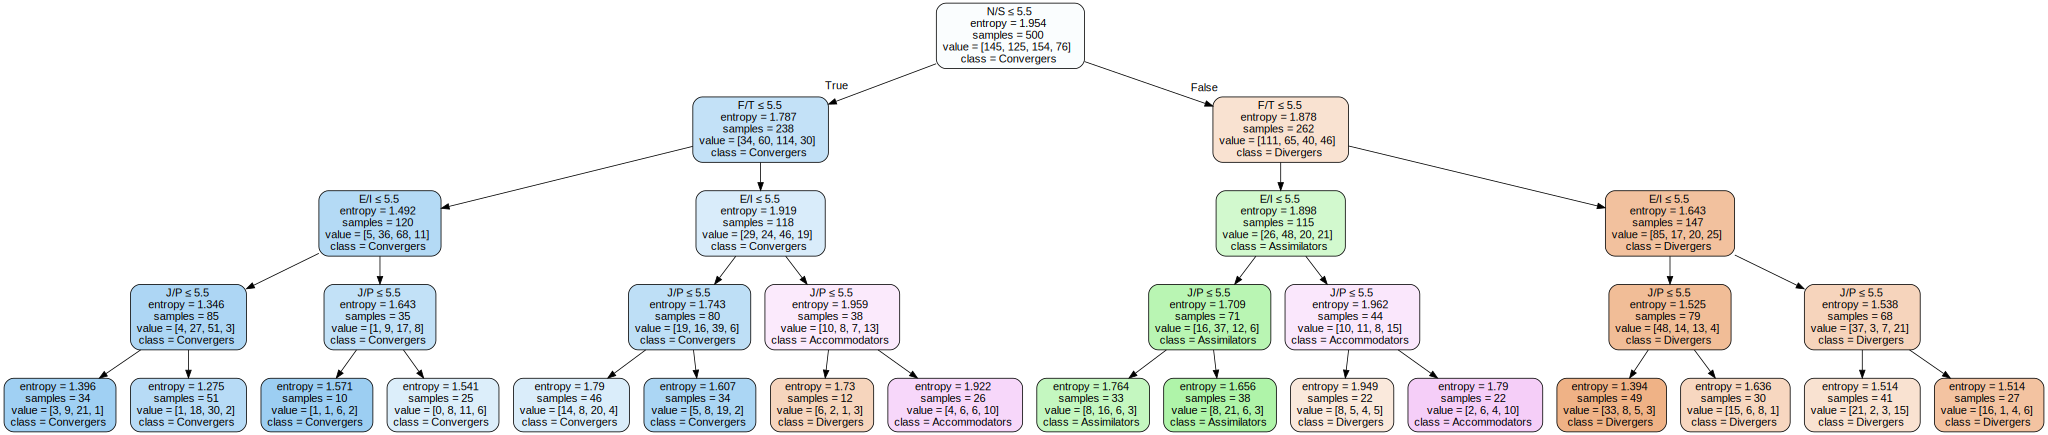

In [ ]:
import graphviz
from subprocess import check_call

dot_data = tree.export_graphviz(clf,   # 의사결정나무 모형 대입
                               out_file = '/content/decision_tree_classifier.dot',  # file로 변환할 것인가
                               feature_names = ['E/I', 'N/S', 'F/T', 'J/P'],  # feature 이름
                               class_names = ['Divergers', 'Assimilators', 'Convergers', 'Accommodators'],  # target 이름
                               filled = True,           # 그림에 색상을 넣을것인가
                               rounded = True,          # 반올림을 진행할 것인가
                               special_characters = True)   # 특수문자를 사용하나
# check_call(['dot','-Tpng','decision_tree_classifier.dot','-o','OutputFile.png'])
graph = graphviz.Source(dot_data)              
graph

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(df_y, clf.predict(df_x))

array([[ 99,  16,  24,   6],
       [ 24,  37,  52,  12],
       [ 25,  12, 107,  10],
       [ 33,   6,  17,  20]])

In [ ]:
clf.predict([[7, 9, 2, 8]])[0]

4

# 11. Kolb 유형 별 Learning Preference & Learning Style

In [ ]:
gb = df_LP.groupby(['kolb_type']).mean()
sum = gb.groupby(gb.index).sum()

fig = go.Figure(data=[
    go.Bar(name='LP1', x=gb.index, y=gb['lp1'], text=gb['lp1'], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='LP2', x=gb.index, y=gb['lp2_r'], text=gb['lp2_r'], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='LP3', x=gb.index, y=gb['lp3_r'], text=gb['lp3_r'], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='LP4', x=gb.index, y=gb['lp4_r'], text=gb['lp4_r'], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='LP5', x=gb.index, y=gb['lp5_r'], text=gb['lp5_r'], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='LP6', x=gb.index, y=gb['lp6_r'], text=gb['lp6_r'], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='LP7', x=gb.index, y=gb['lp7_r'], text=gb['lp7_r'], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='LP8', x=gb.index, y=gb['lp8_r'], text=gb['lp8_r'], textposition='auto', texttemplate='%{text:.2f}')
])
fig.update_layout(title="Learning Preference", height=800, width=1000, barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

print("Sum of Convergers\t :", gb.loc['Convergers'].sum())
print("Sum of Divergers\t :", gb.loc['Divergers'].sum())
print("Sum of Assimilators\t :", gb.loc['Assimilators'].sum())
print("Sum of Accommodators\t :", gb.loc['Accommodators'].sum())

Sum of Convergers	 : 33.37662337662338
Sum of Divergers	 : 32.41379310344828
Sum of Assimilators	 : 32.264
Sum of Accommodators	 : 32.0


In [ ]:
gb = df_LS.groupby(['kolb_type']).mean()

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='LS1', x=gb.index, y=gb[visual[0]], text=gb[visual[0]], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='LS5', x=gb.index, y=gb[visual[1]], text=gb[visual[1]], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='LS11', x=gb.index, y=gb[visual[2]], text=gb[visual[2]], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='LS14', x=gb.index, y=gb[visual[3]], text=gb[visual[3]], textposition='auto', texttemplate='%{text:.2f}')
])
fig.update_layout(title="Learning Style - Visual", height=800, width=1000, barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

print("Sum of Accommodators\t :", gb.loc['Accommodators', visual].sum())
print("Sum of Divergers\t :", gb.loc['Divergers', visual].sum())
print("Sum of Assimilators\t :", gb.loc['Assimilators', visual].sum())
print("Sum of Convergers\t :", gb.loc['Convergers', visual].sum())
print()


fig = go.Figure(data=[
    go.Bar(name='LS2', x=gb.index, y=gb[auditory[0]], text=gb[auditory[0]], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='LS4', x=gb.index, y=gb[auditory[1]], text=gb[auditory[1]], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='LS7', x=gb.index, y=gb[auditory[2]], text=gb[auditory[2]], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='LS9', x=gb.index, y=gb[auditory[3]], text=gb[auditory[3]], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='LS13', x=gb.index, y=gb[auditory[3]], text=gb[auditory[3]], textposition='auto', texttemplate='%{text:.2f}')
])
fig.update_layout(title="Learning Style - Auditory", height=800, width=1000, barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

print("Sum of Accommodators\t :", gb.loc['Accommodators', auditory].sum())
print("Sum of Divergers\t :", gb.loc['Divergers', auditory].sum())
print("Sum of Convergers\t :", gb.loc['Convergers', auditory].sum())
print("Sum of Assimilators\t :", gb.loc['Assimilators', auditory].sum())
print()


fig = go.Figure(data=[
    go.Bar(name='LS3', x=gb.index, y=gb[kinesthetic[0]], text=gb[kinesthetic[0]], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='LS6', x=gb.index, y=gb[kinesthetic[1]], text=gb[kinesthetic[1]], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='LS8', x=gb.index, y=gb[kinesthetic[2]], text=gb[kinesthetic[2]], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='LS10', x=gb.index, y=gb[kinesthetic[3]], text=gb[kinesthetic[3]], textposition='auto', texttemplate='%{text:.2f}'),
    go.Bar(name='LS12', x=gb.index, y=gb[kinesthetic[4]], text=gb[kinesthetic[4]], textposition='auto', texttemplate='%{text:.2f}')
])
fig.update_layout(title="Learning Style - Kinesthetic", height=800, width=1000, barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

print("Sum of Accommodators\t :", gb.loc['Accommodators', kinesthetic].sum())
print("Sum of Divergers\t :", gb.loc['Divergers', kinesthetic].sum())
print("Sum of Convergers\t :", gb.loc['Convergers', kinesthetic].sum())
print("Sum of Assimilators\t :", gb.loc['Assimilators', kinesthetic].sum())
print()

Sum of Accommodators	 : 19.36842105263158
Sum of Divergers	 : 18.910344827586208
Sum of Assimilators	 : 18.864
Sum of Convergers	 : 18.83116883116883



Sum of Accommodators	 : 26.328947368421055
Sum of Divergers	 : 26.055172413793105
Sum of Convergers	 : 24.915584415584412
Sum of Assimilators	 : 24.775999999999996



Sum of Accommodators	 : 26.61842105263158
Sum of Divergers	 : 26.193103448275863
Sum of Convergers	 : 25.714285714285715
Sum of Assimilators	 : 25.432



# 최종 결론

<h3>알고리즘 플로우</h3>

1. 사용자는 본인의 MBTI 정도를 입력 
2. 의사결정트리 모델을 통해 Kolb 유형 분류 
3. Kolb 유형 별 Learning Preference와 Learning Style을 고려
4. 학습 콘텐츠 제공

---

<h3>Kolb 유형 별 Learning Preference & Learning Style 분포</h3>

* Divergers : Learning Preference 낮음 / Learning Style - Visual 낮음, Auditory 높음, Kinesthetic 높음
* Assimilators : Learning Preference 낮음 / Learning Style - Visual 낮음, Auditory 낮음, Kinesthetic 낮음
* Convergers : Learning Preference 높음 / Learning Style - Visual 낮음, Auditory 낮음, Kinesthetic 낮음
* Accomodators : Learning Preference 낮음 / Learning Style - Visual 높음, Auditory 높음, Kinesthetic 높음

> ※ 평균에 대하여 비교한 수치임. 평균보다 높으면 높음, 낮으면 낮음


